<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Learning%20In%20progress/Health_Domain_OR_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1Y599SQf0EwCRJu9gsvY8Jw_z2BoymVBt

Downloading...
From: https://drive.google.com/uc?id=1Y599SQf0EwCRJu9gsvY8Jw_z2BoymVBt
To: /content/Operating_room_utilization_dataset.csv
100% 343k/343k [00:00<00:00, 32.7MB/s]


Data Description
* Date --> The date of the surgery.
* OR Suite --> The operating room where the surgery will take place.
* Service --> The surgical specialty.
* CPT Code --> The code for the surgical procedure.
* CPT Description --> A description of the surgical procedure.
* Booked Time (min) --> The amount of time that was booked for the surgery.
* OR Schedule --> The time that the surgery was scheduled to start.
* Wheels In --> The time that the patient arrived in the operating room.
* Start Time --> The time that the surgery started.
* End Time --> The time that the surgery ended.
* Wheels Out --> The time that the patient left the operating room.



In [3]:
data = pd.read_csv("Operating_room_utilization_dataset.csv")

In [4]:
data.shape

(2172, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              2172 non-null   int64 
 1   Encounter ID       2172 non-null   int64 
 2   Date               2172 non-null   object
 3   OR Suite           2172 non-null   int64 
 4   Service            2172 non-null   object
 5   CPT Code           2172 non-null   int64 
 6   CPT Description    2172 non-null   object
 7   Booked Time (min)  2172 non-null   int64 
 8   OR Schedule        2172 non-null   object
 9   Wheels In          2172 non-null   object
 10  Start Time         2172 non-null   object
 11  End Time           2172 non-null   object
 12  Wheels Out         2172 non-null   object
dtypes: int64(5), object(8)
memory usage: 220.7+ KB


In [6]:
data.duplicated().sum(axis=0)

0

In [7]:
data.isna().sum()

index                0
Encounter ID         0
Date                 0
OR Suite             0
Service              0
CPT Code             0
CPT Description      0
Booked Time (min)    0
OR Schedule          0
Wheels In            0
Start Time           0
End Time             0
Wheels Out           0
dtype: int64

In [8]:
data.head()

,index,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out
0,0,10001,01/03/22,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,01/03/22 07:00 AM,01/03/22 07:05 AM,01/03/22 07:32 AM,01/03/22 09:05 AM,01/03/22 09:17 AM
1,1,10002,01/03/22,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,01/03/22 08:45 AM,01/03/22 09:48 AM,01/03/22 10:13 AM,01/03/22 11:01 AM,01/03/22 11:12 AM
2,2,10003,01/03/22,1,Podiatry,28297,Lapidus bunionectomy,150,01/03/22 10:00 AM,01/03/22 11:50 AM,01/03/22 12:20 PM,01/03/22 12:42 PM,01/03/22 12:58 PM
3,3,10004,01/03/22,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,01/03/22 12:45 PM,01/03/22 01:29 PM,01/03/22 01:53 PM,01/03/22 02:50 PM,01/03/22 03:02 PM
4,4,10005,01/03/22,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,01/03/22 07:00 AM,01/03/22 07:15 AM,01/03/22 07:50 AM,01/03/22 09:38 AM,01/03/22 09:51 AM


# Feature Engineering

In [9]:
data.drop("index", axis=1,inplace = True)

In [10]:
for x in ['Date','OR Schedule', 'Wheels In', 'Start Time', 'End Time', 'Wheels Out']:
  data[x] = pd.to_datetime(data[x])

<ipython-input-10-03ca9e9622da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = pd.to_datetime(data[x])
<ipython-input-10-03ca9e9622da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = pd.to_datetime(data[x])
<ipython-input-10-03ca9e9622da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = pd.to_datetime(data[x])
<ipython-input-10-03ca9e9622da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = pd.t

In [11]:
data.describe()

,Encounter ID,Date,OR Suite,CPT Code,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out
count,2172.000000,2172,2172.000000,2172.000000,2172.000000,2172,2172,2172,2172,2172
mean,11086.500000,2022-02-16 00:09:16.906077440,4.288674,44881.405617,77.189227,2022-02-16 09:48:15.580110336,2022-02-16 10:23:48.149171200,2022-02-16 10:45:19.944751616,2022-02-16 11:30:48.453038848,2022-02-16 11:43:29.972375808
min,10001.000000,2022-01-03 00:00:00,1.000000,14060.000000,30.000000,2022-01-03 07:00:00,2022-01-03 07:03:00,2022-01-03 07:13:00,2022-01-03 07:31:00,2022-01-03 07:38:00
25%,10543.750000,2022-01-25 00:00:00,3.000000,28296.000000,60.000000,2022-01-25 11:15:00,2022-01-25 12:33:45,2022-01-25 12:57:15,2022-01-25 13:35:15,2022-01-25 13:48:15
50%,11086.500000,2022-02-16 00:00:00,4.000000,42826.000000,60.000000,2022-02-16 08:15:00,2022-02-16 08:37:30,2022-02-16 09:00:00,2022-02-16 09:30:30,2022-02-16 09:44:00
75%,11629.250000,2022-03-10 00:00:00,6.000000,66982.000000,90.000000,2022-03-10 09:30:00,2022-03-10 10:30:15,2022-03-10 10:54:00,2022-03-10 11:40:00,2022-03-10 11:55:00
max,12172.000000,2022-03-31 00:00:00,8.000000,69436.000000,180.000000,2022-03-31 14:00:00,2022-03-31 14:30:00,2022-03-31 14:50:00,2022-03-31 15:50:00,2022-03-31 16:02:00
std,627.146713,NaN,2.163514,18087.419079,30.430015,NaN,NaN,NaN,NaN,NaN


In [12]:
data["Week#"] = data["OR Schedule"].dt.strftime("%U")

In [13]:
data["Week#"].value_counts()

Week#
10    185
06    178
11    177
09    176
01    174
05    174
04    173
07    172
12    172
02    169
13    143
08    142
03    137
Name: count, dtype: int64

In [14]:
data["Dayofweek"] = data["OR Schedule"].dt.strftime("%A")

In [15]:
data["Dayofweek"].value_counts()

Dayofweek
Tuesday      456
Wednesday    455
Thursday     451
Friday       422
Monday       388
Name: count, dtype: int64

* So OR rooms are used only on WeekDays

In [16]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek'],
      dtype='object')

In [17]:
data["ORSchedule_Wheelsin"] = (data["Wheels In"] - data["OR Schedule"])/np.timedelta64(1,"m")
data["Wheelsin_Start"] = (data["Start Time"]-data["Wheels In"])/np.timedelta64(1,"m")
data["Start_End"] = (data["End Time"]-data["Start Time"])/np.timedelta64(1,"m")
data["End_Wheelsout"] = (data["Wheels Out"]-data["End Time"])/np.timedelta64(1,"m")
data["Wheelsin_Wheelsout"] = (data["Wheels Out"]-data["Wheels In"])/np.timedelta64(1,"m")

In [18]:
data["ORSchedule_Wheelsin Ratio"] = data["ORSchedule_Wheelsin"]/data["Booked Time (min)"]
data["Wheelsin_Start Ratio"] = data["Wheelsin_Start"]/data["Booked Time (min)"]
data["Start_End Ratio"] = data["Start_End"]/data["Booked Time (min)"]
data["End_Wheelsout Ratio"] = data["End_Wheelsout"]/data["Booked Time (min)"]
data["Wheelsin_Wheelsout Ratio"] = data["Wheelsin_Wheelsout"]/data["Booked Time (min)"]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Encounter ID               2172 non-null   int64         
 1   Date                       2172 non-null   datetime64[ns]
 2   OR Suite                   2172 non-null   int64         
 3   Service                    2172 non-null   object        
 4   CPT Code                   2172 non-null   int64         
 5   CPT Description            2172 non-null   object        
 6   Booked Time (min)          2172 non-null   int64         
 7   OR Schedule                2172 non-null   datetime64[ns]
 8   Wheels In                  2172 non-null   datetime64[ns]
 9   Start Time                 2172 non-null   datetime64[ns]
 10  End Time                   2172 non-null   datetime64[ns]
 11  Wheels Out                 2172 non-null   datetime64[ns]
 12  Week# 

In [20]:
data.tail()

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,ORSchedule_Wheelsin,Wheelsin_Start,Start_End,End_Wheelsout,Wheelsin_Wheelsout,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,Wheelsin_Wheelsout Ratio
2167,12168,2022-03-31,7,Pediatrics,69421,"Myringotomy, general anesthesia",60,2022-03-31 10:45:00,2022-03-31 11:59:00,2022-03-31 12:11:00,...,74.0,12.0,28.0,12.0,52.0,1.233333,0.200000,0.466667,0.200000,0.866667
2168,12169,2022-03-31,7,Pediatrics,69421,"Myringotomy, general anesthesia",60,2022-03-31 12:00:00,2022-03-31 13:20:00,2022-03-31 13:47:00,...,80.0,27.0,27.0,14.0,68.0,1.333333,0.450000,0.450000,0.233333,1.133333
2169,12170,2022-03-31,8,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-03-31 07:00:00,2022-03-31 07:06:00,2022-03-31 07:45:00,...,6.0,39.0,81.0,12.0,132.0,0.050000,0.325000,0.675000,0.100000,1.100000
2170,12171,2022-03-31,8,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-03-31 09:15:00,2022-03-31 09:40:00,2022-03-31 10:15:00,...,25.0,35.0,85.0,21.0,141.0,0.208333,0.291667,0.708333,0.175000,1.175000
2171,12172,2022-03-31,8,Orthopedics,27130,"Arthroplasty, hip",120,2022-03-31 11:30:00,2022-03-31 12:40:00,2022-03-31 13:12:00,...,70.0,32.0,88.0,18.0,138.0,0.583333,0.266667,0.733333,0.150000,1.150000


# Univariate & Bivariate Analysis

In [21]:
for x in data.columns:
  #print("Values count of feature ",x)
  print( x,":", data[x].nunique())

Encounter ID : 2172
Date : 62
OR Suite : 8
Service : 10
CPT Code : 32
CPT Description : 32
Booked Time (min) : 8
OR Schedule : 981
Wheels In : 1982
Start Time : 2000
End Time : 2047
Wheels Out : 2100
Week# : 13
Dayofweek : 5
ORSchedule_Wheelsin : 61
Wheelsin_Start : 24
Start_End : 52
End_Wheelsout : 17
Wheelsin_Wheelsout : 56
ORSchedule_Wheelsin Ratio : 67
Wheelsin_Start Ratio : 36
Start_End Ratio : 46
End_Wheelsout Ratio : 31
Wheelsin_Wheelsout Ratio : 53


### Date

In [22]:
data.Date.describe()

count                             2172
mean     2022-02-16 00:09:16.906077440
min                2022-01-03 00:00:00
25%                2022-01-25 00:00:00
50%                2022-02-16 00:00:00
75%                2022-03-10 00:00:00
max                2022-03-31 00:00:00
Name: Date, dtype: object

In [23]:
data.Date.nunique()

62

In [24]:
# Average no o fof OR bookings per Day
data.groupby("Date")["Encounter ID"].count().mean()

35.03225806451613

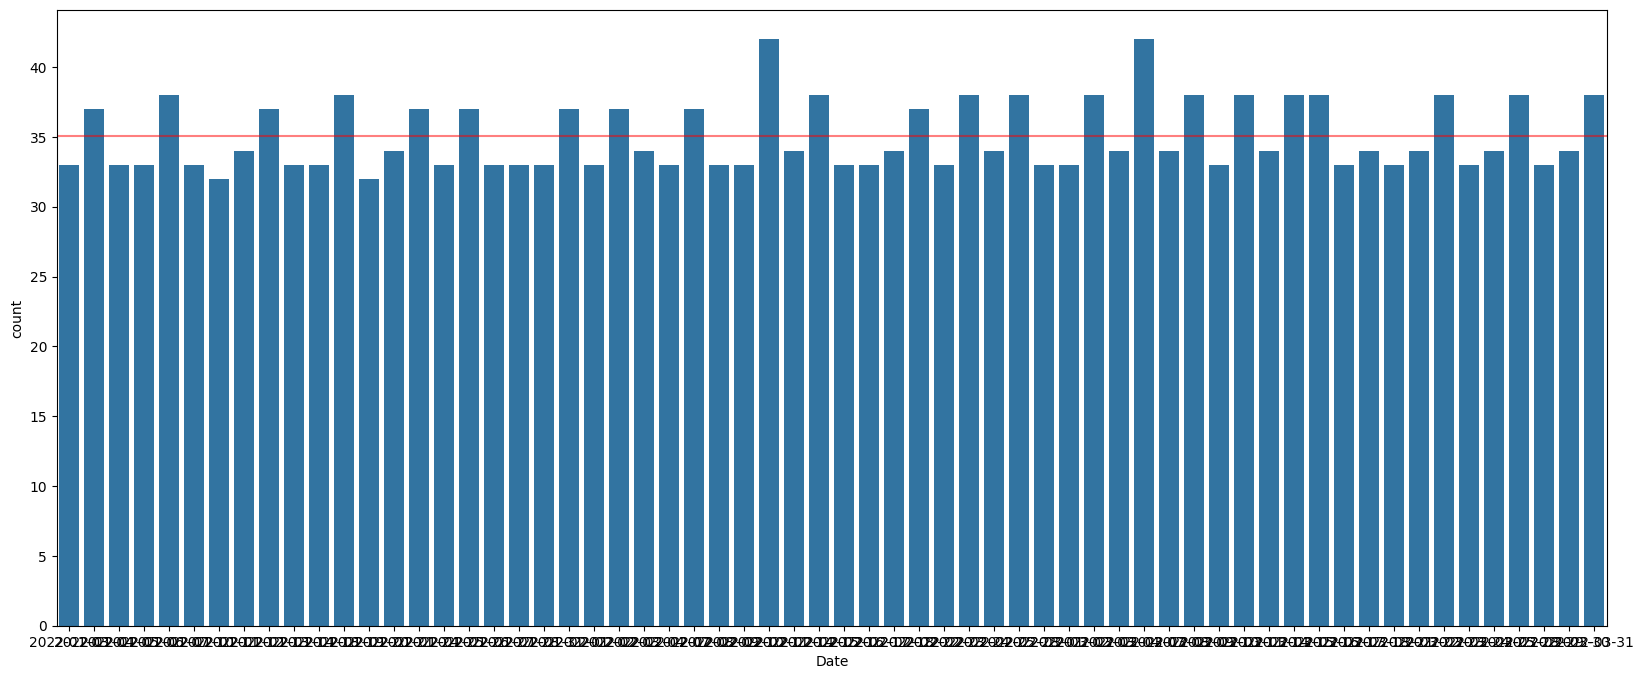

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=data, x = "Date")
ax.axhline(data.groupby("Date")["Encounter ID"].count().mean(), color='red', alpha = 0.5)

### Service

In [26]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End', 'End_Wheelsout',
       'Wheelsin_Wheelsout', 'ORSchedule_Wheelsin Ratio',
       'Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',
       'Wheelsin_Wheelsout Ratio'],
      dtype='object')

In [27]:
data["Service"].nunique()

10

In [28]:
data["Service"].value_counts()

Service
Ophthalmology    334
Orthopedics      321
Podiatry         246
Pediatrics       220
Plastic          207
ENT              197
Urology          193
Vascular         173
OBGYN            164
General          117
Name: count, dtype: int64

### OR Suite

In [29]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End', 'End_Wheelsout',
       'Wheelsin_Wheelsout', 'ORSchedule_Wheelsin Ratio',
       'Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',
       'Wheelsin_Wheelsout Ratio'],
      dtype='object')

In [30]:
data["OR Suite"].nunique()

8

In [31]:
data["OR Suite"].value_counts()

OR Suite
3    439
7    288
5    286
4    268
2    252
1    246
6    207
8    186
Name: count, dtype: int64

In [32]:
pd.crosstab(data["Service"], data["OR Suite"])

OR Suite,1,2,3,4,5,6,7,8
Service,,,,,,,,
ENT,0,0,0,0,197,0,0,0
General,0,0,0,0,0,0,0,117
OBGYN,0,0,0,164,0,0,0,0
Ophthalmology,0,0,334,0,0,0,0,0
Orthopedics,0,252,0,0,0,0,0,69
Pediatrics,0,0,105,0,0,0,115,0
Plastic,0,0,0,0,0,207,0,0
Podiatry,246,0,0,0,0,0,0,0
Urology,0,0,0,104,89,0,0,0


### CPT Code & CPT Description

In [33]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End', 'End_Wheelsout',
       'Wheelsin_Wheelsout', 'ORSchedule_Wheelsin Ratio',
       'Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',
       'Wheelsin_Wheelsout Ratio'],
      dtype='object')

In [34]:
data["CPT Code"].nunique()

32

In [35]:
data["CPT Code"].value_counts()

CPT Code
66982    334
42826    151
69436    132
29877    112
36901     95
69421     88
14060     86
28296     85
27445     82
58562     82
57460     82
43775     78
28820     78
55250     78
52353     76
17110     69
30520     46
28060     42
64721     42
28285     42
55873     39
47562     39
15773     36
28289     23
27130     23
26045     21
26735     21
26356     20
28055     18
28297     18
28110     18
30400     16
Name: count, dtype: int64

In [36]:
data.groupby(["Service"])["CPT Code"].nunique().reset_index()

,Service,CPT Code
0,ENT,2
1,General,2
2,OBGYN,2
3,Ophthalmology,1
4,Orthopedics,7
5,Pediatrics,2
6,Plastic,4
7,Podiatry,7
8,Urology,3
9,Vascular,2


In [37]:
data.groupby(["Service","CPT Code","CPT Description"])["Encounter ID"].count().reset_index().sort_values(by = "Encounter ID",ascending = False)

,Service,CPT Code,CPT Description,Encounter ID
6,Ophthalmology,66982,Extracapsular cataract removal,334
1,ENT,42826,Tonsillectomy,151
15,Pediatrics,69436,"Tympanostomy, general anesthesia",132
12,Orthopedics,29877,"Arthroscopy, knee, surgical",112
31,Vascular,36901,AV fistula,95
14,Pediatrics,69421,"Myringotomy, general anesthesia",88
16,Plastic,14060,"Adjacent tissue transfer, eyelids, nose, ears,...",86
25,Podiatry,28296,Bunionectomy with distal osteotomy,85
11,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",82
5,OBGYN,58562,"Hysterectomy, surgical",82


### Week#

In [38]:
data["Week#"].nunique()

13

In [39]:
 A = data.groupby("Week#").aggregate({"Date":"nunique","Encounter ID": "count"}).reset_index()
 A

,Week#,Date,Encounter ID
0,01,5,174
1,02,5,169
2,03,4,137
3,04,5,173
4,05,5,174
5,06,5,178
6,07,5,172
7,08,4,142
8,09,5,176
9,10,5,185


<Axes: xlabel='Week#', ylabel='count'>

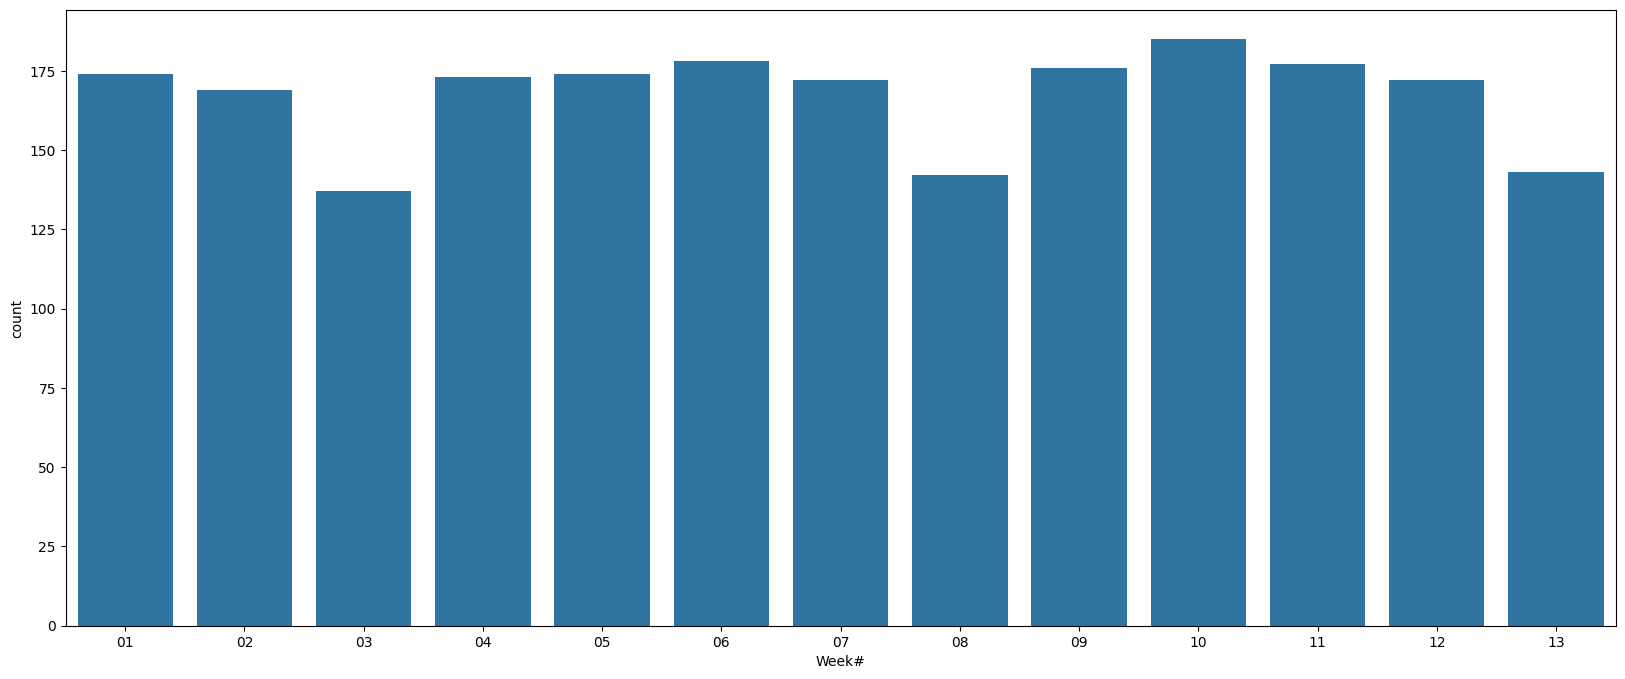

In [40]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=data, x= "Week#")

### Booked Time (min)

In [41]:
data["Booked Time (min)"].nunique()

8

In [42]:
data["Booked Time (min)"].value_counts()

Booked Time (min)
60     951
120    473
45     326
90     183
75     177
180     36
150     18
30       8
Name: count, dtype: int64

<Axes: xlabel='Booked Time (min)', ylabel='count'>

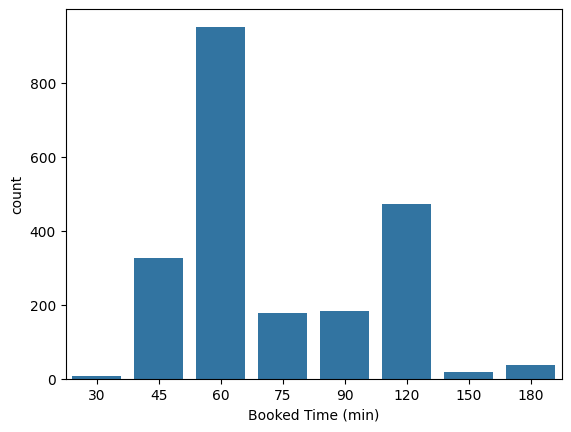

In [43]:
sns.countplot(data =data, x= "Booked Time (min)")

In [44]:
pd.crosstab(data["Service"], data["Booked Time (min)"])

Booked Time (min),30,45,60,75,90,120,150,180
Service,,,,,,,,
ENT,0,0,151,0,46,0,0,0
General,0,0,0,0,39,78,0,0
OBGYN,0,0,0,82,0,82,0,0
Ophthalmology,8,326,0,0,0,0,0,0
Orthopedics,0,0,154,0,41,126,0,0
Pediatrics,0,0,220,0,0,0,0,0
Plastic,0,0,69,0,0,102,0,36
Podiatry,0,0,125,0,18,85,18,0
Urology,0,0,154,0,39,0,0,0


In [45]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End', 'End_Wheelsout',
       'Wheelsin_Wheelsout', 'ORSchedule_Wheelsin Ratio',
       'Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',
       'Wheelsin_Wheelsout Ratio'],
      dtype='object')

### Wheelsin_Wheelsout [Actual Usage]

In [46]:
data["Wheelsin_Wheelsout"].describe()

count    2172.000000
mean       79.697053
std        31.822390
min        19.000000
25%        62.000000
50%        73.000000
75%        96.000000
max       173.000000
Name: Wheelsin_Wheelsout, dtype: float64

<Axes: xlabel='Wheelsin_Wheelsout', ylabel='Count'>

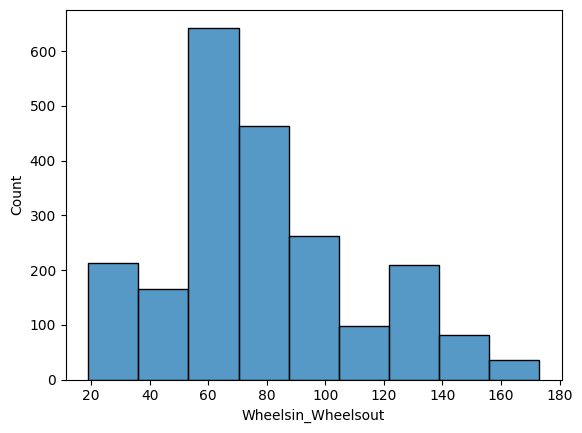

In [47]:
sns.histplot(data["Wheelsin_Wheelsout"], bins = 9)

### ORSchedule_Wheelsin

In [48]:
data["ORSchedule_Wheelsin"].mean()

35.54281767955801

#### Service

In [49]:
data.groupby("Service")["ORSchedule_Wheelsin"].mean().reset_index()

,Service,ORSchedule_Wheelsin
0,ENT,29.527919
1,General,33.666667
2,OBGYN,22.000000
3,Ophthalmology,-3.673653
4,Orthopedics,60.950156
5,Pediatrics,46.200000
6,Plastic,16.241546
7,Podiatry,49.804878
8,Urology,55.730570
9,Vascular,51.809249


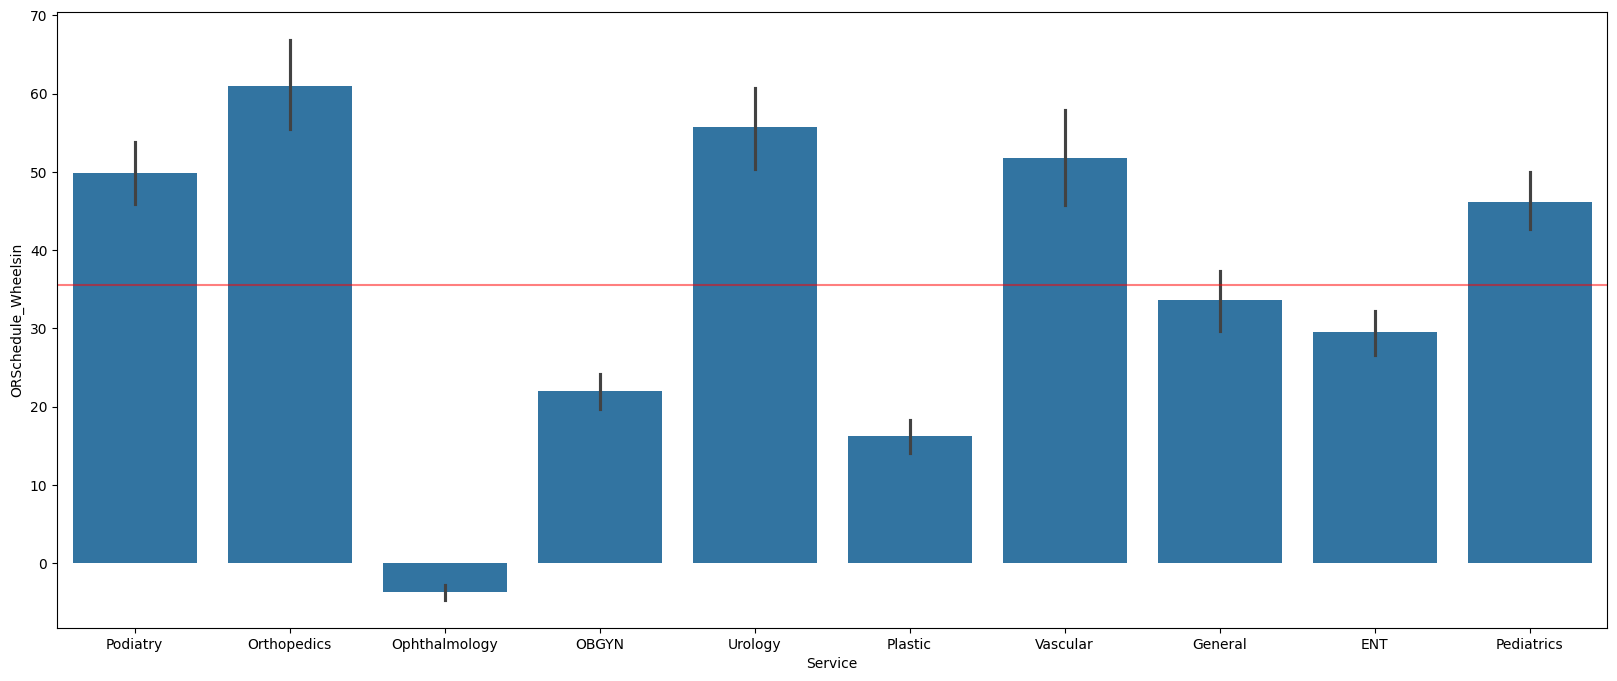

In [50]:
# Service wise ORSchedule_Wheelsin
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Service",y = "ORSchedule_Wheelsin", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin"].mean(), color='red', alpha = 0.5)

#### CPT Description

In [51]:
data.groupby("CPT Description")["ORSchedule_Wheelsin"].mean().reset_index()

,CPT Description,ORSchedule_Wheelsin
0,AV fistula,82.126316
1,"Adjacent tissue transfer, eyelids, nose, ears,...",16.325581
2,"Arthroplasty, hip",70.000000
3,"Arthroplasty, knee, hinge prothesis",27.353659
4,"Arthroscopy, knee, surgical",89.455357
5,Bunionectomy with distal osteotomy,56.141176
6,"Carpal tunnel release, open",16.000000
7,Cervical biopsy,26.000000
8,"Correction, hammertoe",60.000000
9,Cryosurgery of the prostate gland,24.000000


In [52]:
data.groupby(["Service","CPT Description"])["ORSchedule_Wheelsin"].mean().reset_index().sort_values(by ="ORSchedule_Wheelsin",ascending = True).head(10)

,Service,CPT Description,ORSchedule_Wheelsin
6,Ophthalmology,Extracapsular cataract removal,-3.673653
25,Podiatry,"Partial ostectomy, fifth metatarsal head",5.000000
19,Plastic,Rhinoplasty,14.000000
31,Vascular,"Digital amputation, metatarsophalangeal joint",14.884615
18,Plastic,Removal of benign skin lesion,16.000000
10,Orthopedics,"Carpal tunnel release, open",16.000000
16,Plastic,"Adjacent tissue transfer, eyelids, nose, ears,...",16.325581
17,Plastic,Liposuction,17.500000
0,ENT,Septoplasty,17.500000
5,OBGYN,"Hysterectomy, surgical",18.000000


In [53]:
data.groupby(["Service","CPT Description"])["ORSchedule_Wheelsin"].mean().reset_index().sort_values(by ="ORSchedule_Wheelsin",ascending = False).head(10)

,Service,CPT Description,ORSchedule_Wheelsin
23,Podiatry,Lapidus bunionectomy,110.000000
12,Orthopedics,Flexor tendon repair,103.000000
9,Orthopedics,"Arthroscopy, knee, surgical",89.455357
13,Orthopedics,"ORIF, phalangeal shaft fracture",83.000000
30,Vascular,AV fistula,82.126316
28,Urology,Cystourethroscopy,81.684211
14,Pediatrics,"Myringotomy, general anesthesia",77.000000
7,Orthopedics,"Arthroplasty, hip",70.000000
24,Podiatry,"Neurectomy, intrinsic musculature of foot",63.000000
21,Podiatry,"Correction, hammertoe",60.000000


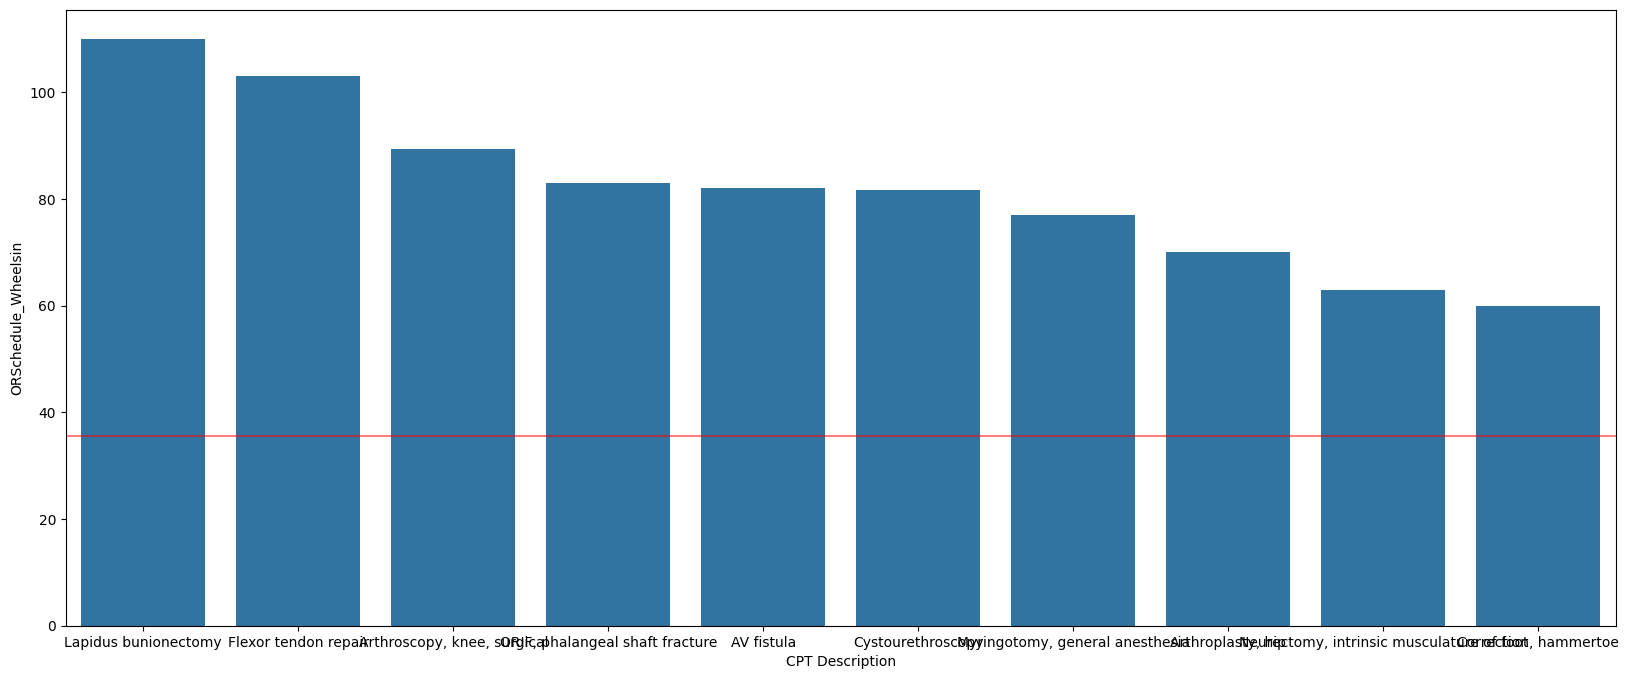

In [54]:
# CPT Description wise ORSchedule_Wheelsin
A = data.groupby("CPT Description")["ORSchedule_Wheelsin"].mean().reset_index().sort_values(by ="ORSchedule_Wheelsin",ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="CPT Description",y = "ORSchedule_Wheelsin")
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin"].mean(), color='red', alpha = 0.5)

#### OR Suites

In [55]:
data.groupby("OR Suite")["ORSchedule_Wheelsin"].mean().reset_index()

,OR Suite,ORSchedule_Wheelsin
0,1,49.804878
1,2,68.420635
2,3,8.255125
3,4,34.537313
4,5,38.199301
5,6,16.241546
6,7,49.569444
7,8,33.666667


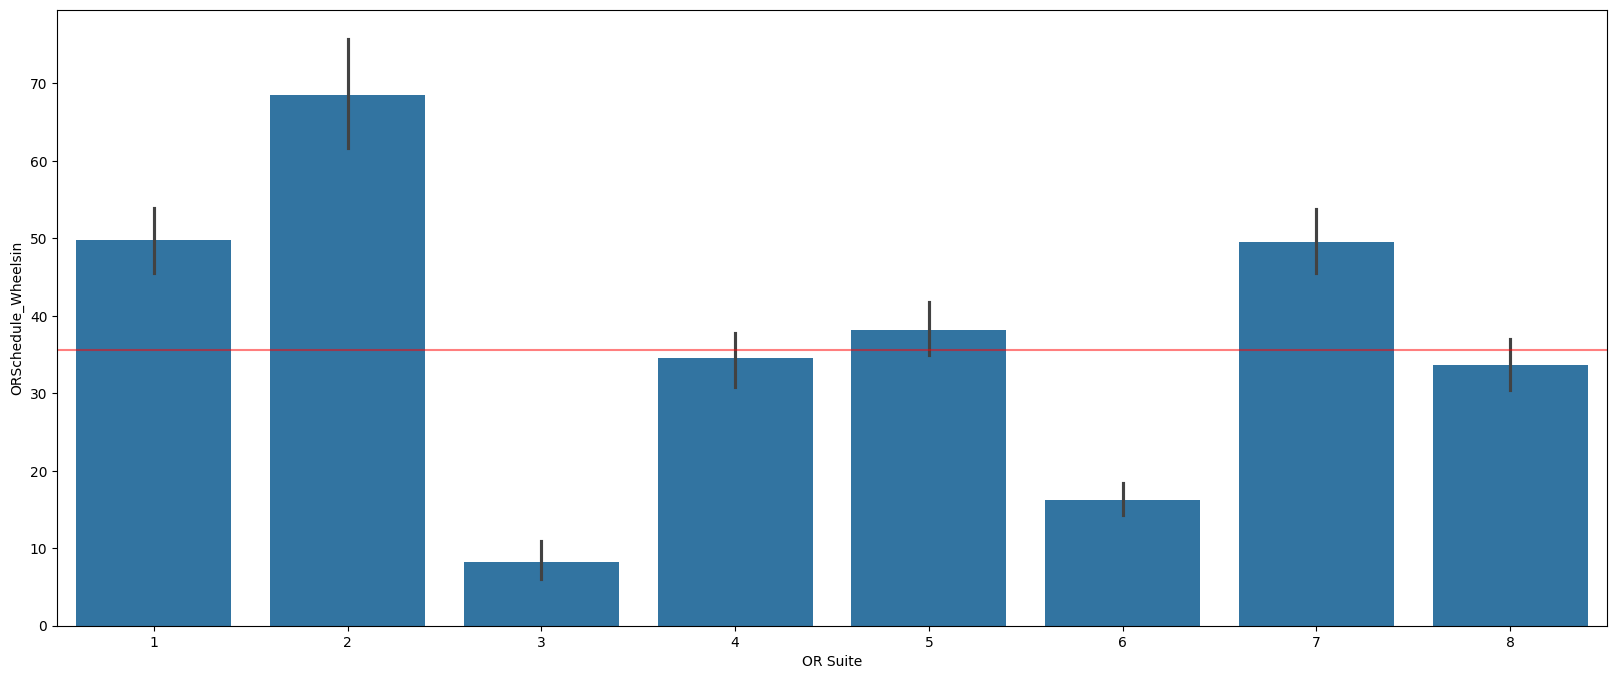

In [56]:
# OR Suite wise ORSchedule_Wheelsin
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="OR Suite",y = "ORSchedule_Wheelsin", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin"].mean(), color='red', alpha = 0.5)

#### Week

In [57]:
data.groupby("Week#")["ORSchedule_Wheelsin"].mean().reset_index()

,Week#,ORSchedule_Wheelsin
0,01,33.902299
1,02,36.544379
2,03,34.956204
3,04,35.647399
4,05,36.034483
5,06,35.078652
6,07,36.377907
7,08,35.612676
8,09,36.761364
9,10,33.800000


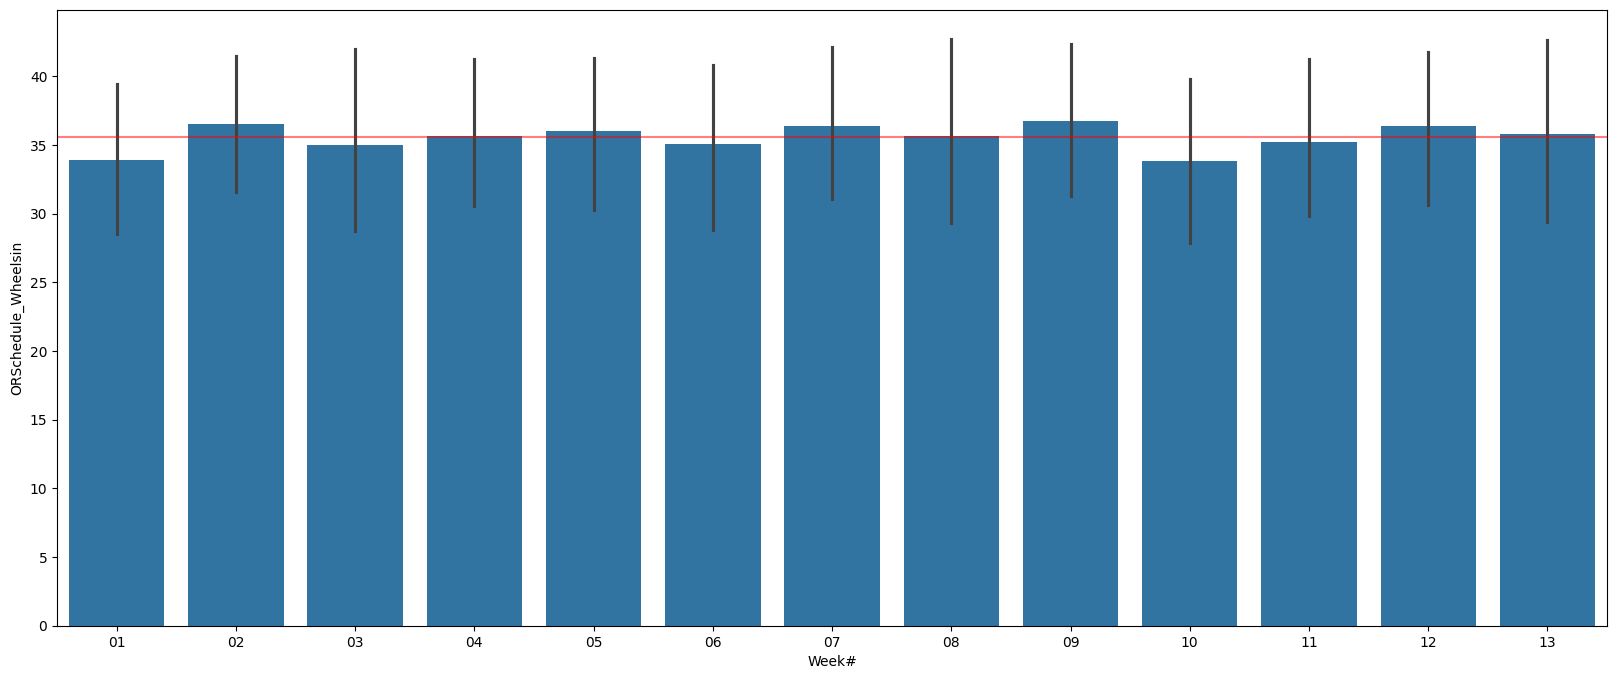

In [58]:
# Service wise ORSchedule_Wheelsin
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Week#",y = "ORSchedule_Wheelsin", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin"].mean(), color='red', alpha = 0.5)

### Wheelsin_Start

In [59]:
data["Wheelsin_Start"].mean()

21.529926335174952

#### Service

In [60]:
data.groupby("Service")["Wheelsin_Start"].mean().reset_index()

,Service,Wheelsin_Start
0,ENT,22.736041
1,General,19.666667
2,OBGYN,23.250000
3,Ophthalmology,10.823353
4,Orthopedics,28.056075
5,Pediatrics,22.400000
6,Plastic,21.579710
7,Podiatry,24.491870
8,Urology,21.290155
9,Vascular,23.236994


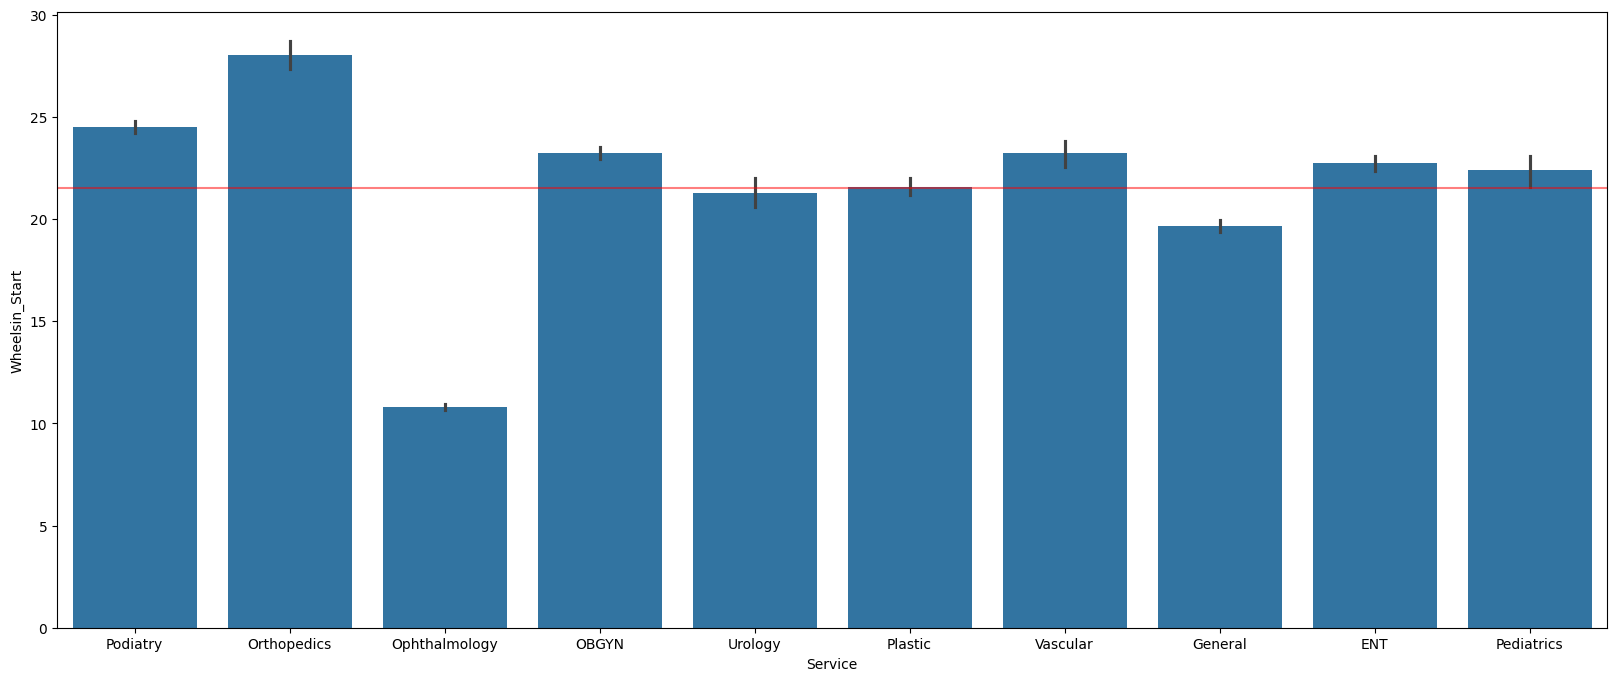

In [61]:
# Service wise Wheelsin_Start
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Service",y = "Wheelsin_Start", estimator=np.mean)
# drawing average line
ax.axhline(data["Wheelsin_Start"].mean(), color='red', alpha = 0.5)

#### CPT Description

In [62]:
data.groupby("CPT Description")["Wheelsin_Start"].mean().reset_index()

,CPT Description,Wheelsin_Start
0,AV fistula,24.568421
1,"Adjacent tissue transfer, eyelids, nose, ears,...",22.534884
2,"Arthroplasty, hip",32.000000
3,"Arthroplasty, knee, hinge prothesis",36.853659
4,"Arthroscopy, knee, surgical",25.339286
5,Bunionectomy with distal osteotomy,23.529412
6,"Carpal tunnel release, open",22.500000
7,Cervical biopsy,25.000000
8,"Correction, hammertoe",22.500000
9,Cryosurgery of the prostate gland,23.000000


In [63]:
data.groupby(["Service","CPT Description"])["Wheelsin_Start"].mean().reset_index().sort_values(by ="Wheelsin_Start",ascending = True).head(10)

,Service,CPT Description,Wheelsin_Start
6,Ophthalmology,Extracapsular cataract removal,10.823353
29,Urology,Vasectomy,18.961538
2,General,Laparoscopic cholecystectomy,19.000000
14,Pediatrics,"Myringotomy, general anesthesia",19.500000
18,Plastic,Removal of benign skin lesion,19.666667
3,General,Sleeve gastrectomy,20.000000
17,Plastic,Liposuction,21.000000
12,Orthopedics,Flexor tendon repair,21.000000
0,ENT,Septoplasty,21.500000
5,OBGYN,"Hysterectomy, surgical",21.500000


In [64]:
data.groupby(["Service","CPT Description"])["Wheelsin_Start"].mean().reset_index().sort_values(by ="Wheelsin_Start",ascending = False).head(10)

,Service,CPT Description,Wheelsin_Start
8,Orthopedics,"Arthroplasty, knee, hinge prothesis",36.853659
7,Orthopedics,"Arthroplasty, hip",32.000000
23,Podiatry,Lapidus bunionectomy,30.000000
25,Podiatry,"Partial ostectomy, fifth metatarsal head",27.000000
19,Plastic,Rhinoplasty,26.000000
13,Orthopedics,"ORIF, phalangeal shaft fracture",25.761905
9,Orthopedics,"Arthroscopy, knee, surgical",25.339286
22,Podiatry,Hallux rigidus correction with cheilectomy,25.000000
4,OBGYN,Cervical biopsy,25.000000
24,Podiatry,"Neurectomy, intrinsic musculature of foot",25.000000


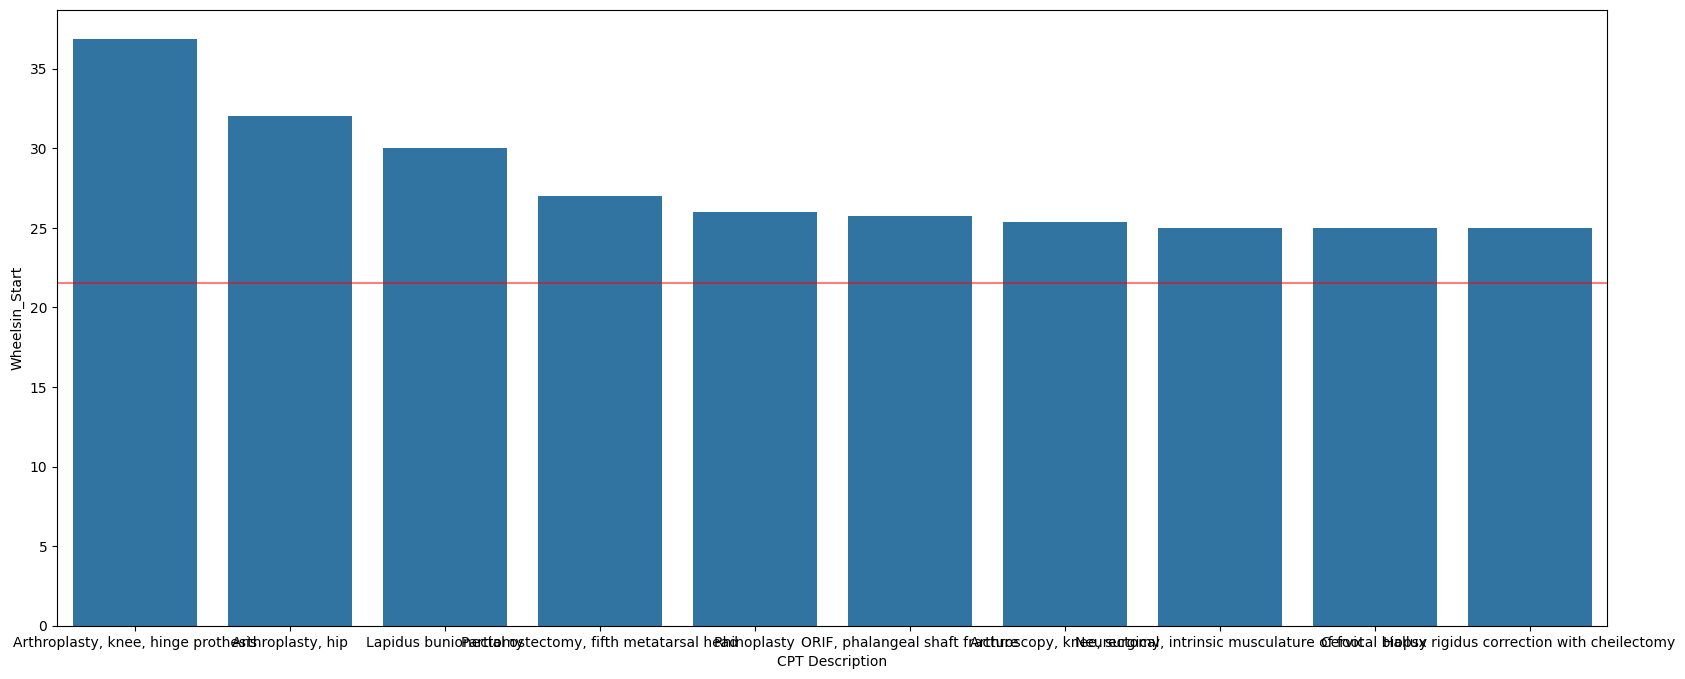

In [65]:
# CPT Description wise Wheelsin_Start
A = data.groupby("CPT Description")["Wheelsin_Start"].mean().reset_index().sort_values(by ="Wheelsin_Start",ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="CPT Description",y = "Wheelsin_Start")
# drawing average line
ax.axhline(data["Wheelsin_Start"].mean(), color='red', alpha = 0.5)

#### OR Suites

In [66]:
data.groupby("OR Suite")["Wheelsin_Start"].mean().reset_index()

,OR Suite,Wheelsin_Start
0,1,24.491870
1,2,26.063492
2,3,13.592255
3,4,22.451493
4,5,22.321678
5,6,21.579710
6,7,22.902778
7,8,25.478495


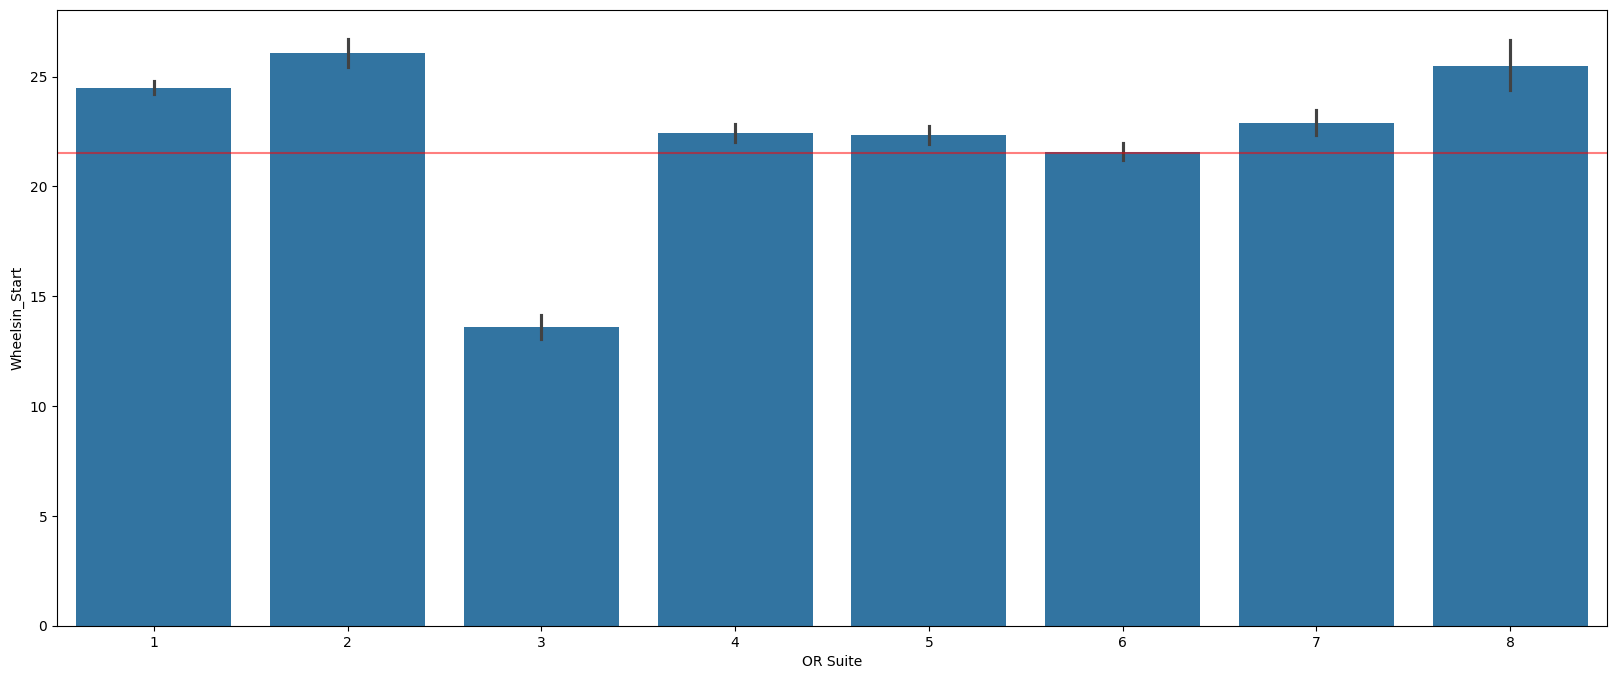

In [67]:
# OR Suite wise Wheelsin_Start
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="OR Suite",y = "Wheelsin_Start", estimator=np.mean)
# drawing average line
ax.axhline(data["Wheelsin_Start"].mean(), color='red', alpha = 0.5)

#### Week

In [68]:
data.groupby("Week#")["Wheelsin_Start"].mean().reset_index()

,Week#,Wheelsin_Start
0,01,21.316092
1,02,22.017751
2,03,21.335766
3,04,21.768786
4,05,21.821839
5,06,21.269663
6,07,21.552326
7,08,21.478873
8,09,21.698864
9,10,21.086486


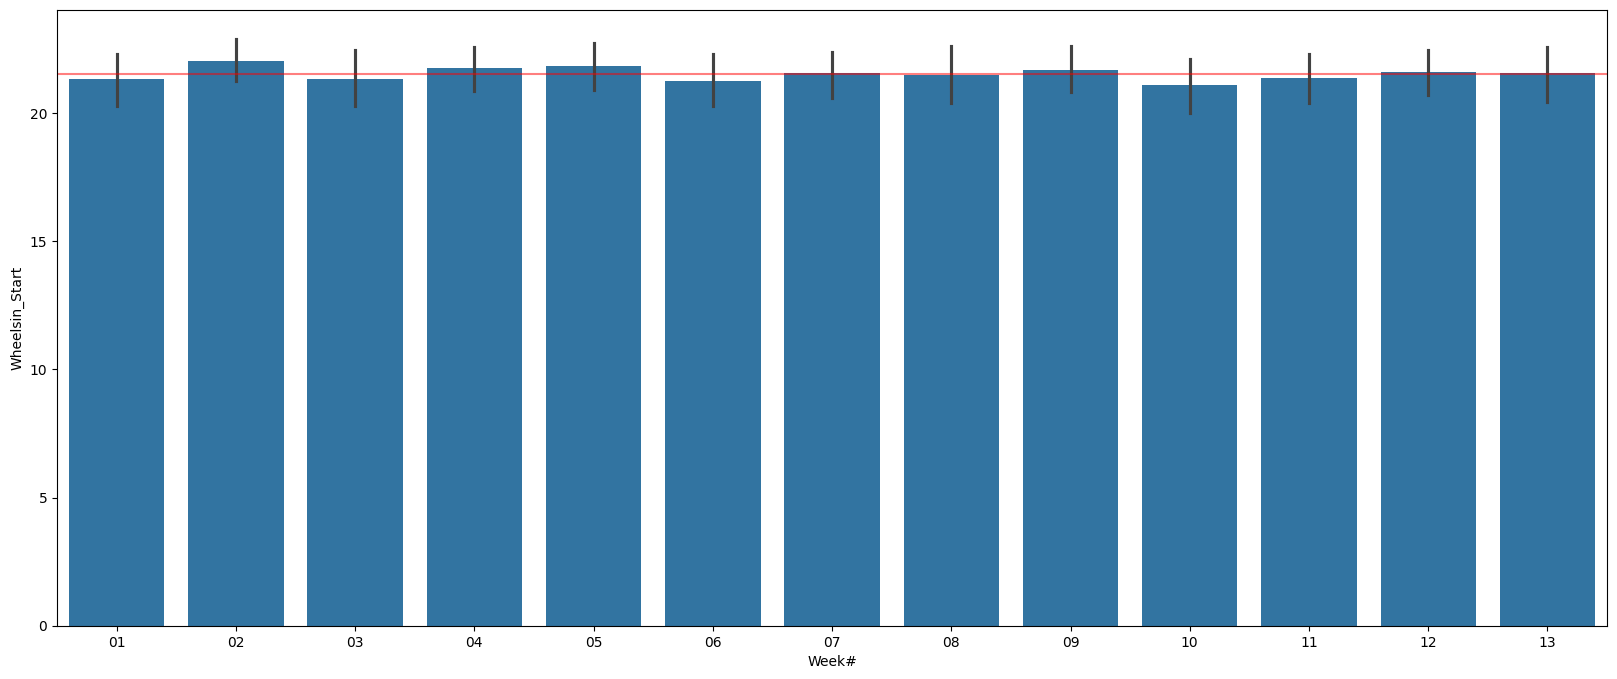

In [69]:
# Service wise Wheelsin_Start
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Week#",y = "Wheelsin_Start", estimator=np.mean)
# drawing average line
ax.axhline(data["Wheelsin_Start"].mean(), color='red', alpha = 0.5)

### Start_End

In [70]:
data["Start_End"].mean()

45.47513812154696

#### Service

In [71]:
data.groupby("Service")["Start_End"].mean().reset_index()

,Service,Start_End
0,ENT,33.944162
1,General,80.000000
2,OBGYN,55.250000
3,Ophthalmology,16.302395
4,Orthopedics,58.177570
5,Pediatrics,30.200000
6,Plastic,69.019324
7,Podiatry,56.288618
8,Urology,36.538860
9,Vascular,44.589595


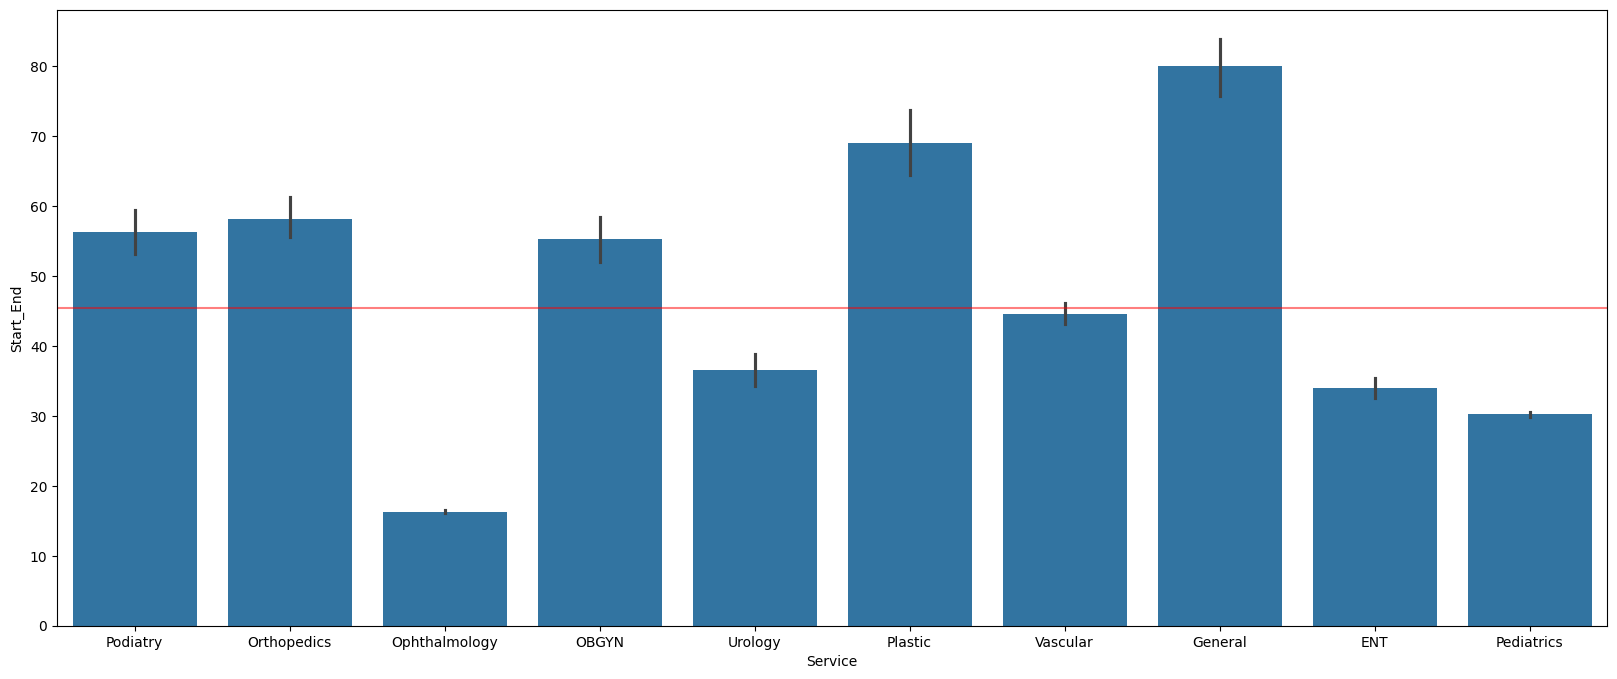

In [72]:
# Service wise Start_End
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Service",y = "Start_End", estimator=np.mean)
# drawing average line
ax.axhline(data["Start_End"].mean(), color='red', alpha = 0.5)

#### CPT Description

In [73]:
data.groupby("CPT Description")["Start_End"].mean().reset_index()

,CPT Description,Start_End
0,AV fistula,54.105263
1,"Adjacent tissue transfer, eyelids, nose, ears,...",75.453488
2,"Arthroplasty, hip",88.000000
3,"Arthroplasty, knee, hinge prothesis",90.170732
4,"Arthroscopy, knee, surgical",34.696429
5,Bunionectomy with distal osteotomy,77.741176
6,"Carpal tunnel release, open",35.500000
7,Cervical biopsy,33.500000
8,"Correction, hammertoe",45.000000
9,Cryosurgery of the prostate gland,66.000000


In [74]:
data.groupby(["Service","CPT Description"])["Start_End"].mean().reset_index().sort_values(by ="Start_End",ascending = True).head(10)

,Service,CPT Description,Start_End
6,Ophthalmology,Extracapsular cataract removal,16.302395
23,Podiatry,Lapidus bunionectomy,22.000000
28,Urology,Cystourethroscopy,23.986842
14,Pediatrics,"Myringotomy, general anesthesia",27.500000
1,ENT,Tonsillectomy,28.291391
15,Pediatrics,"Tympanostomy, general anesthesia",32.000000
18,Plastic,Removal of benign skin lesion,32.666667
31,Vascular,"Digital amputation, metatarsophalangeal joint",33.000000
4,OBGYN,Cervical biopsy,33.500000
29,Urology,Vasectomy,34.038462


In [75]:
data.groupby(["Service","CPT Description"])["Start_End"].mean().reset_index().sort_values(by ="Start_End",ascending = False).head(10)

,Service,CPT Description,Start_End
17,Plastic,Liposuction,122.000000
3,General,Sleeve gastrectomy,96.000000
25,Podiatry,"Partial ostectomy, fifth metatarsal head",93.000000
8,Orthopedics,"Arthroplasty, knee, hinge prothesis",90.170732
7,Orthopedics,"Arthroplasty, hip",88.000000
13,Orthopedics,"ORIF, phalangeal shaft fracture",84.000000
20,Podiatry,Bunionectomy with distal osteotomy,77.741176
5,OBGYN,"Hysterectomy, surgical",77.000000
16,Plastic,"Adjacent tissue transfer, eyelids, nose, ears,...",75.453488
19,Plastic,Rhinoplasty,72.000000


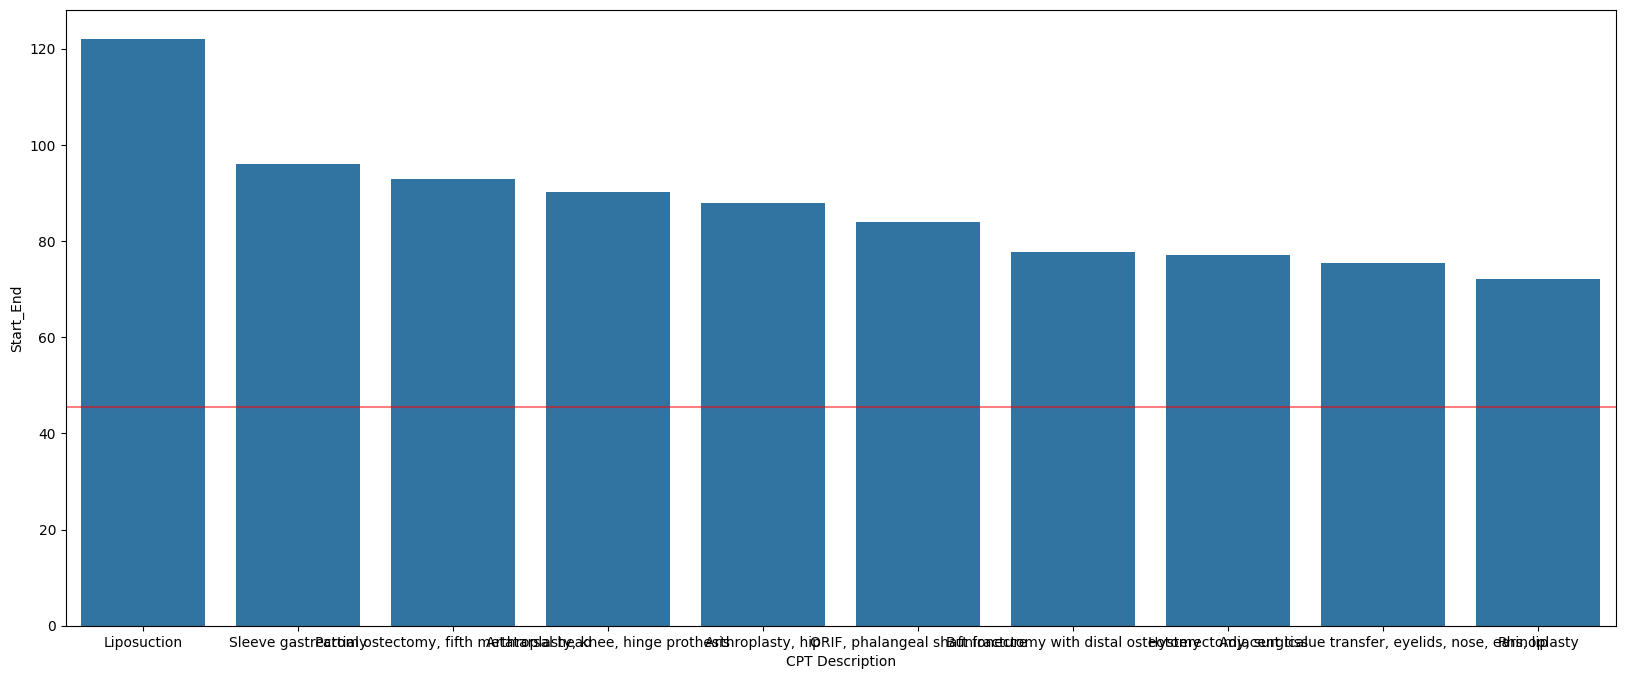

In [76]:
# CPT Description wise Start_End
A = data.groupby("CPT Description")["Start_End"].mean().reset_index().sort_values(by ="Start_End",ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="CPT Description",y = "Start_End")
# drawing average line
ax.axhline(data["Start_End"].mean(), color='red', alpha = 0.5)

#### OR Suites

In [77]:
data.groupby("OR Suite")["Start_End"].mean().reset_index()

,OR Suite,Start_End
0,1,56.288618
1,2,50.924603
2,3,19.626424
3,4,47.597015
4,5,35.118881
5,6,69.019324
6,7,38.843750
7,8,81.731183


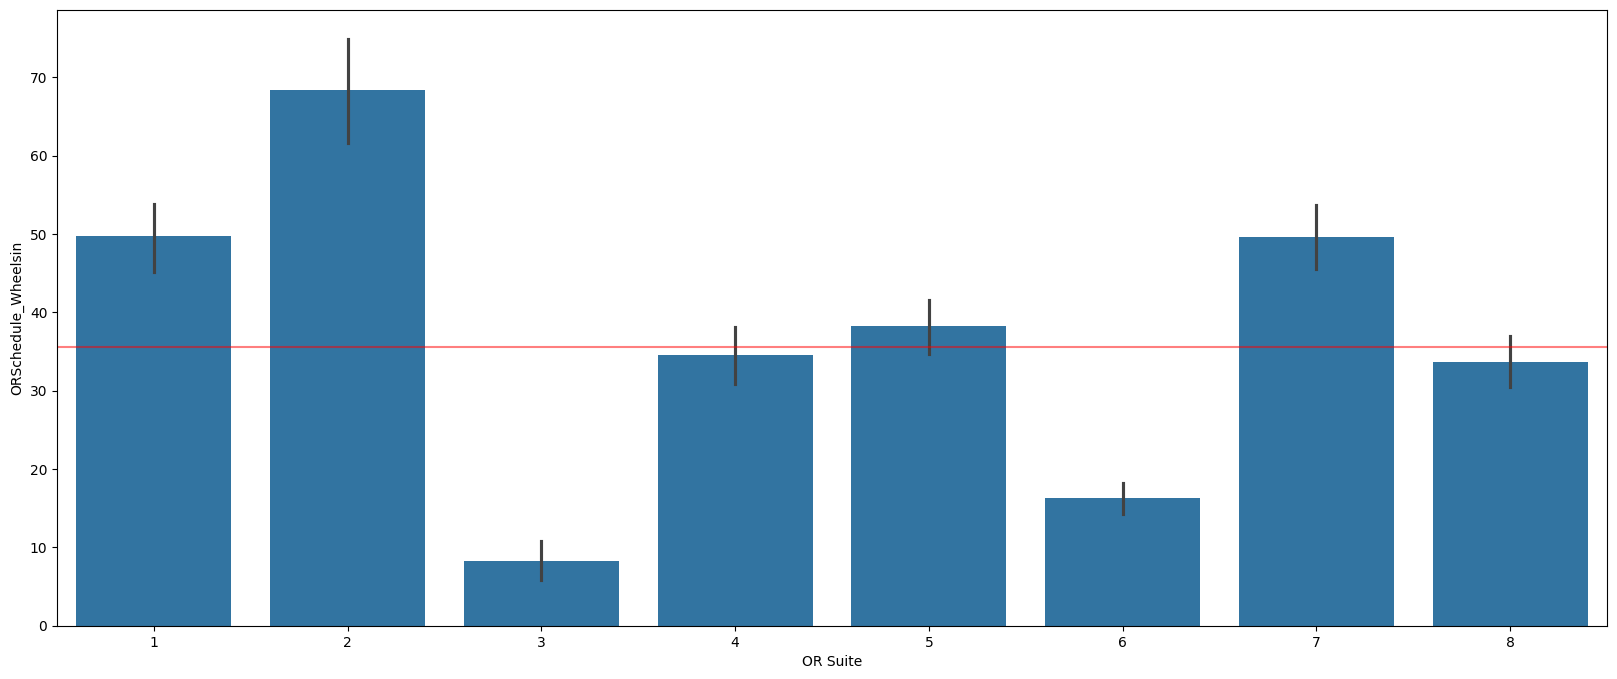

In [78]:
# OR Suite wise ORSchedule_Wheelsin
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="OR Suite",y = "ORSchedule_Wheelsin", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin"].mean(), color='red', alpha = 0.5)

#### Week

In [79]:
data.groupby("Week#")["Start_End"].mean().reset_index()

,Week#,Start_End
0,01,46.252874
1,02,45.355030
2,03,47.189781
3,04,45.063584
4,05,45.097701
5,06,44.140449
6,07,46.703488
7,08,45.140845
8,09,44.920455
9,10,43.859459


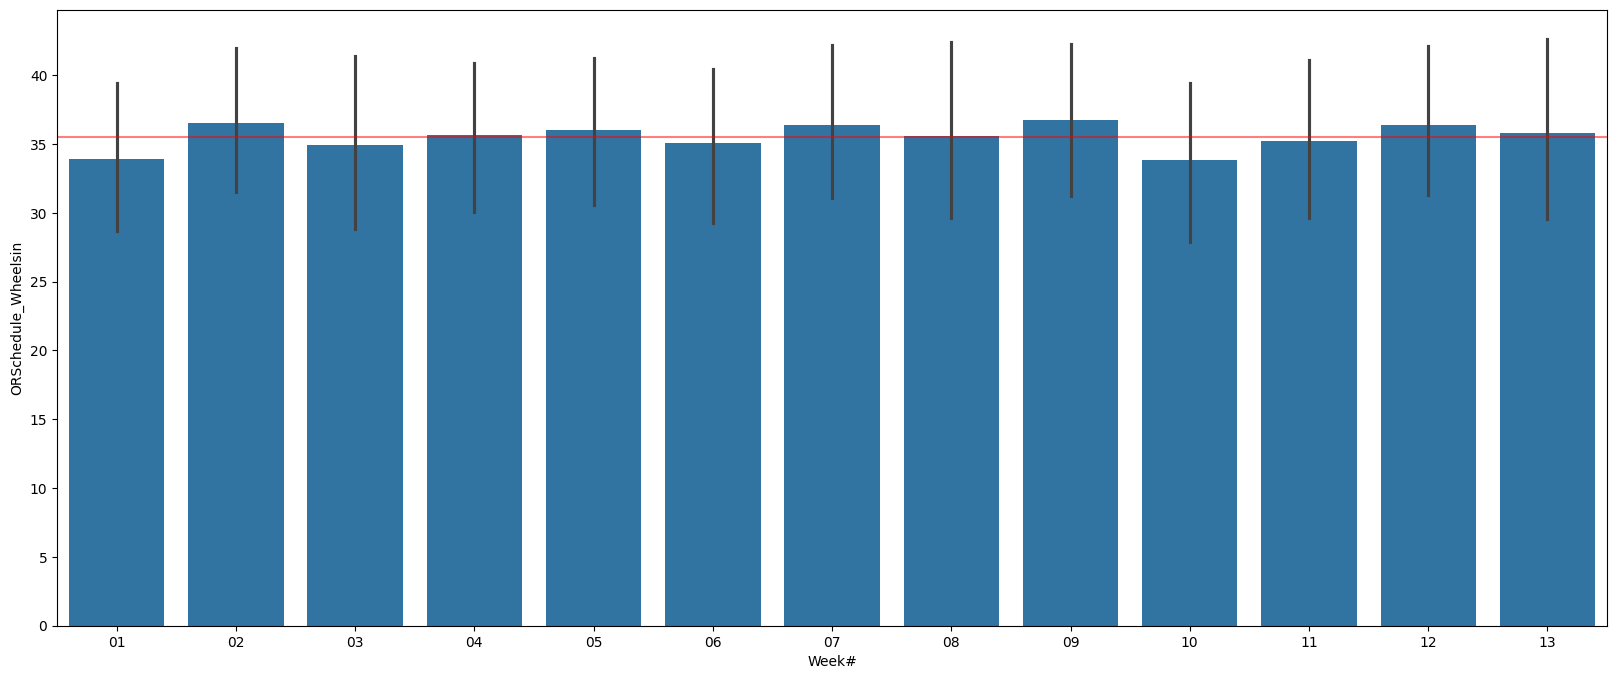

In [80]:
# Service wise ORSchedule_Wheelsin
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Week#",y = "ORSchedule_Wheelsin", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin"].mean(), color='red', alpha = 0.5)

### End_Wheelsout

In [81]:
data["End_Wheelsout"].mean()

12.691988950276244

#### Service

In [82]:
data.groupby("Service")["End_Wheelsout"].mean().reset_index()

,Service,End_Wheelsout
0,ENT,12.416244
1,General,13.333333
2,OBGYN,13.250000
3,Ophthalmology,8.745509
4,Orthopedics,14.725857
5,Pediatrics,13.400000
6,Plastic,12.821256
7,Podiatry,13.548780
8,Urology,12.927461
9,Vascular,13.352601


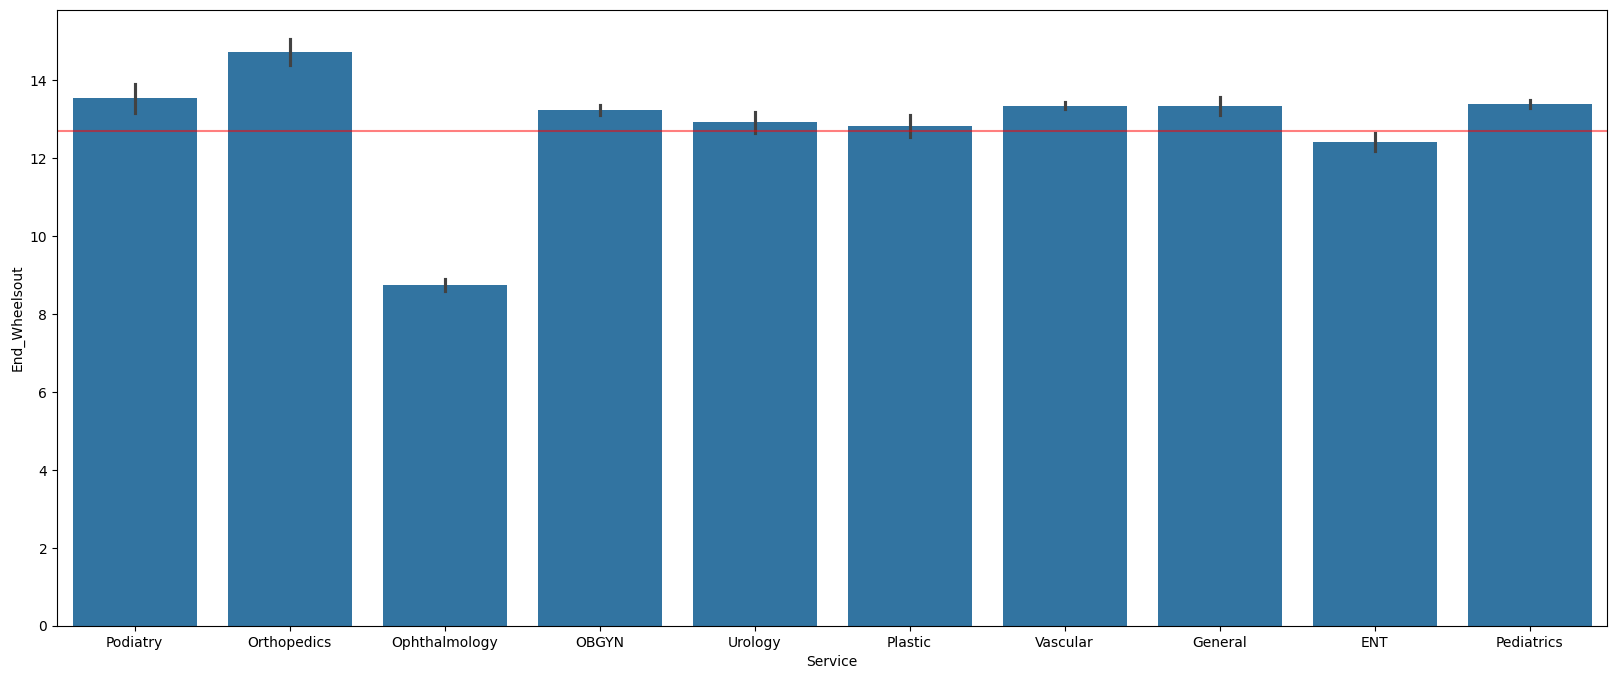

In [83]:
# Service wise End_Wheelsout
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Service",y = "End_Wheelsout", estimator=np.mean)
# drawing average line
ax.axhline(data["End_Wheelsout"].mean(), color='red', alpha = 0.5)

#### CPT Description

In [84]:
data.groupby("CPT Description")["End_Wheelsout"].mean().reset_index()

,CPT Description,End_Wheelsout
0,AV fistula,13.642105
1,"Adjacent tissue transfer, eyelids, nose, ears,...",14.023256
2,"Arthroplasty, hip",18.000000
3,"Arthroplasty, knee, hinge prothesis",16.060976
4,"Arthroscopy, knee, surgical",13.437500
5,Bunionectomy with distal osteotomy,14.164706
6,"Carpal tunnel release, open",12.000000
7,Cervical biopsy,13.500000
8,"Correction, hammertoe",16.000000
9,Cryosurgery of the prostate gland,15.000000


In [85]:
data.groupby(["Service","CPT Description"])["End_Wheelsout"].mean().reset_index().sort_values(by ="End_Wheelsout",ascending = True).head(10)

,Service,CPT Description,End_Wheelsout
6,Ophthalmology,Extracapsular cataract removal,8.745509
22,Podiatry,Hallux rigidus correction with cheilectomy,10.000000
18,Plastic,Removal of benign skin lesion,10.666667
24,Podiatry,"Neurectomy, intrinsic musculature of foot",11.000000
11,Orthopedics,"Fasciotomy, palmar, open",11.904762
0,ENT,Septoplasty,12.000000
29,Urology,Vasectomy,12.000000
25,Podiatry,"Partial ostectomy, fifth metatarsal head",12.000000
10,Orthopedics,"Carpal tunnel release, open",12.000000
26,Podiatry,Plantar fasciotomy,12.500000


In [86]:
data.groupby(["Service","CPT Description"])["End_Wheelsout"].mean().reset_index().sort_values(by ="End_Wheelsout",ascending = False).head(10)

,Service,CPT Description,End_Wheelsout
12,Orthopedics,Flexor tendon repair,19.000000
7,Orthopedics,"Arthroplasty, hip",18.000000
13,Orthopedics,"ORIF, phalangeal shaft fracture",17.000000
8,Orthopedics,"Arthroplasty, knee, hinge prothesis",16.060976
23,Podiatry,Lapidus bunionectomy,16.000000
21,Podiatry,"Correction, hammertoe",16.000000
27,Urology,Cryosurgery of the prostate gland,15.000000
20,Podiatry,Bunionectomy with distal osteotomy,14.164706
16,Plastic,"Adjacent tissue transfer, eyelids, nose, ears,...",14.023256
17,Plastic,Liposuction,14.000000


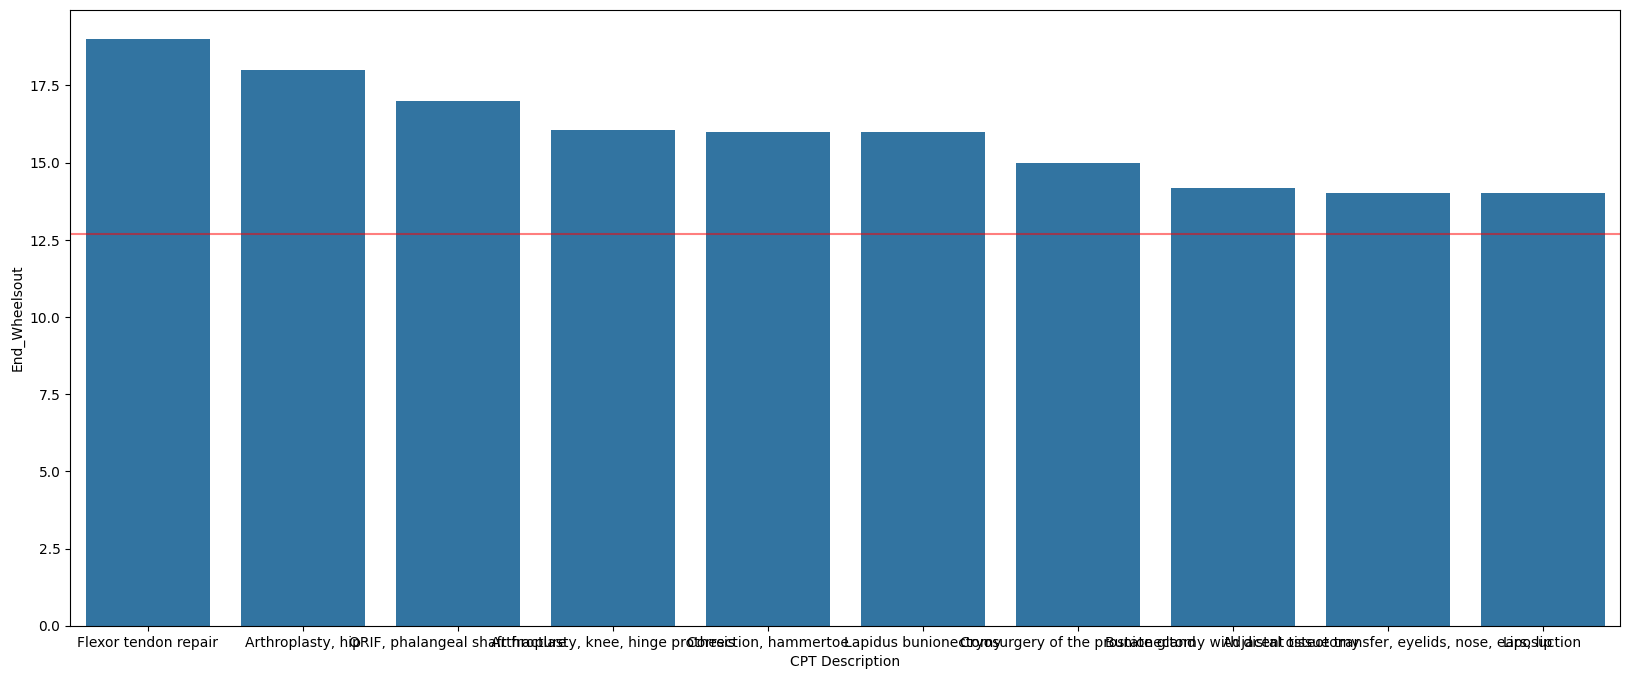

In [87]:
# CPT Description wise End_Wheelsout
A = data.groupby("CPT Description")["End_Wheelsout"].mean().reset_index().sort_values(by ="End_Wheelsout",ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="CPT Description",y = "End_Wheelsout")
# drawing average line
ax.axhline(data["End_Wheelsout"].mean(), color='red', alpha = 0.5)

#### OR Suites

In [88]:
data.groupby("OR Suite")["End_Wheelsout"].mean().reset_index()

,OR Suite,End_Wheelsout
0,1,13.548780
1,2,14.103175
2,3,9.858770
3,4,12.843284
4,5,12.839161
5,6,12.821256
6,7,13.371528
7,8,14.693548


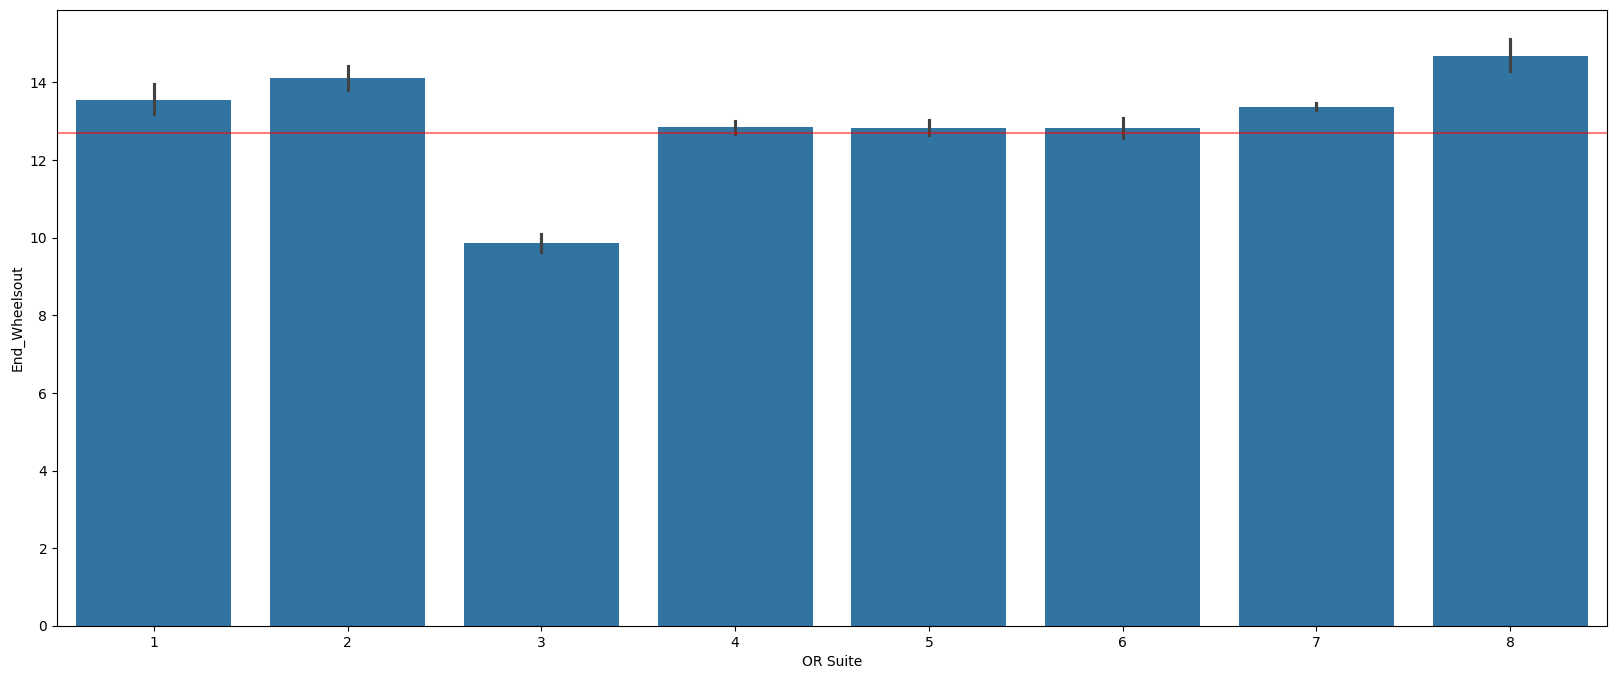

In [89]:
# OR Suite wise End_Wheelsout
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="OR Suite",y = "End_Wheelsout", estimator=np.mean)
# drawing average line
ax.axhline(data["End_Wheelsout"].mean(), color='red', alpha = 0.5)

#### Week

In [90]:
data.groupby("Week#")["End_Wheelsout"].mean().reset_index()

,Week#,End_Wheelsout
0,01,12.568966
1,02,13.023669
2,03,12.649635
3,04,12.838150
4,05,12.827586
5,06,12.629213
6,07,12.796512
7,08,12.612676
8,09,12.761364
9,10,12.335135


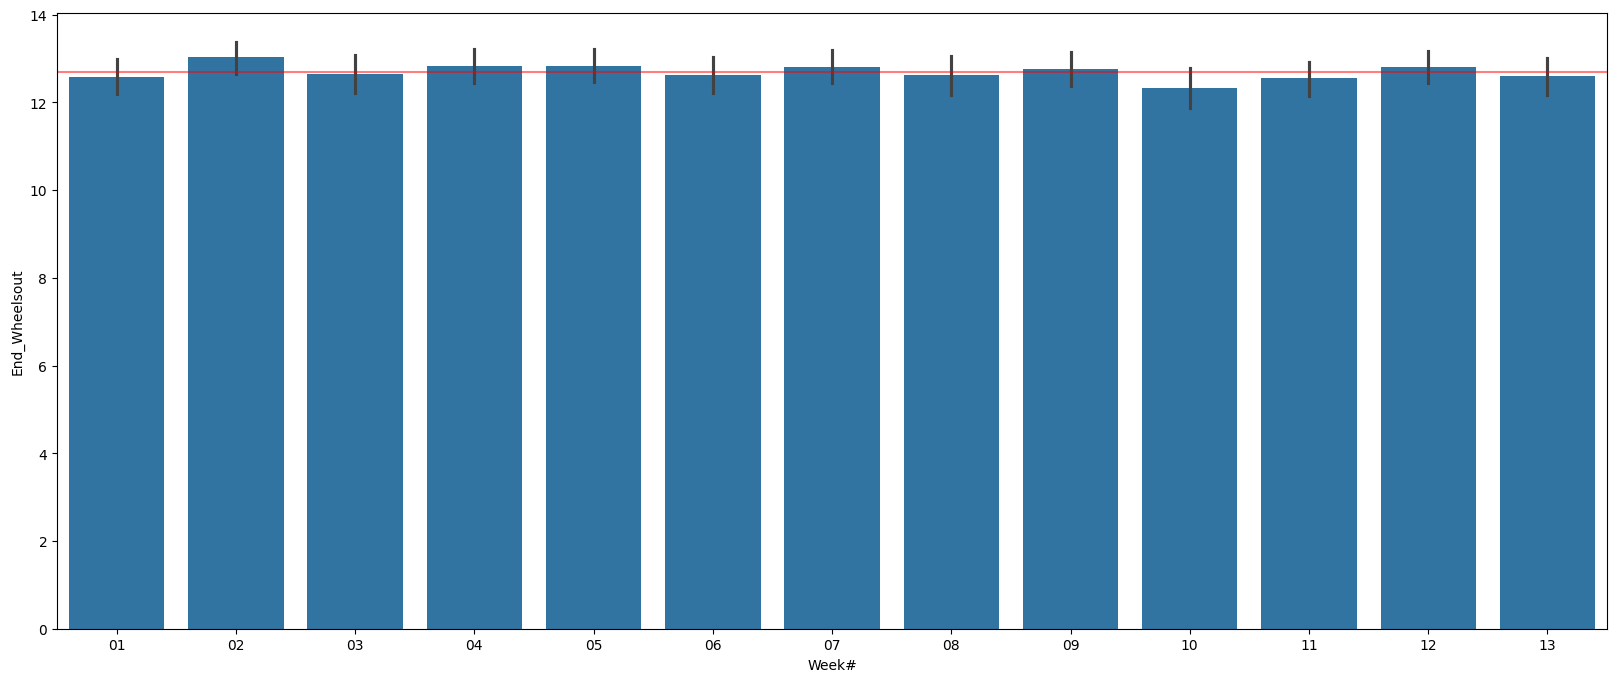

In [91]:
# Service wise End_Wheelsout
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Week#",y = "End_Wheelsout", estimator=np.mean)
# drawing average line
ax.axhline(data["End_Wheelsout"].mean(), color='red', alpha = 0.5)

### Planned Vs Actual Usage

In [92]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End', 'End_Wheelsout',
       'Wheelsin_Wheelsout', 'ORSchedule_Wheelsin Ratio',
       'Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',
       'Wheelsin_Wheelsout Ratio'],
      dtype='object')

<Axes: xlabel='Wheelsin_Wheelsout', ylabel='Booked Time (min)'>

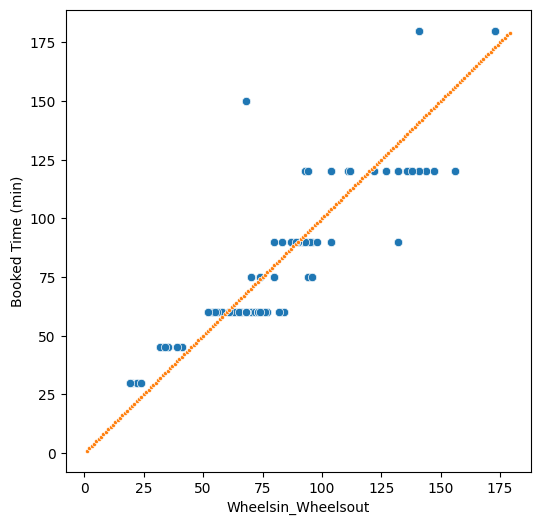

In [93]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data, x = "Wheelsin_Wheelsout",y= "Booked Time (min)")
A =np.arange(1,180,1)
sns.scatterplot(x =A ,y= A,marker = ".")

<Axes: xlabel='Wheelsin_Wheelsout', ylabel='Booked Time (min)'>

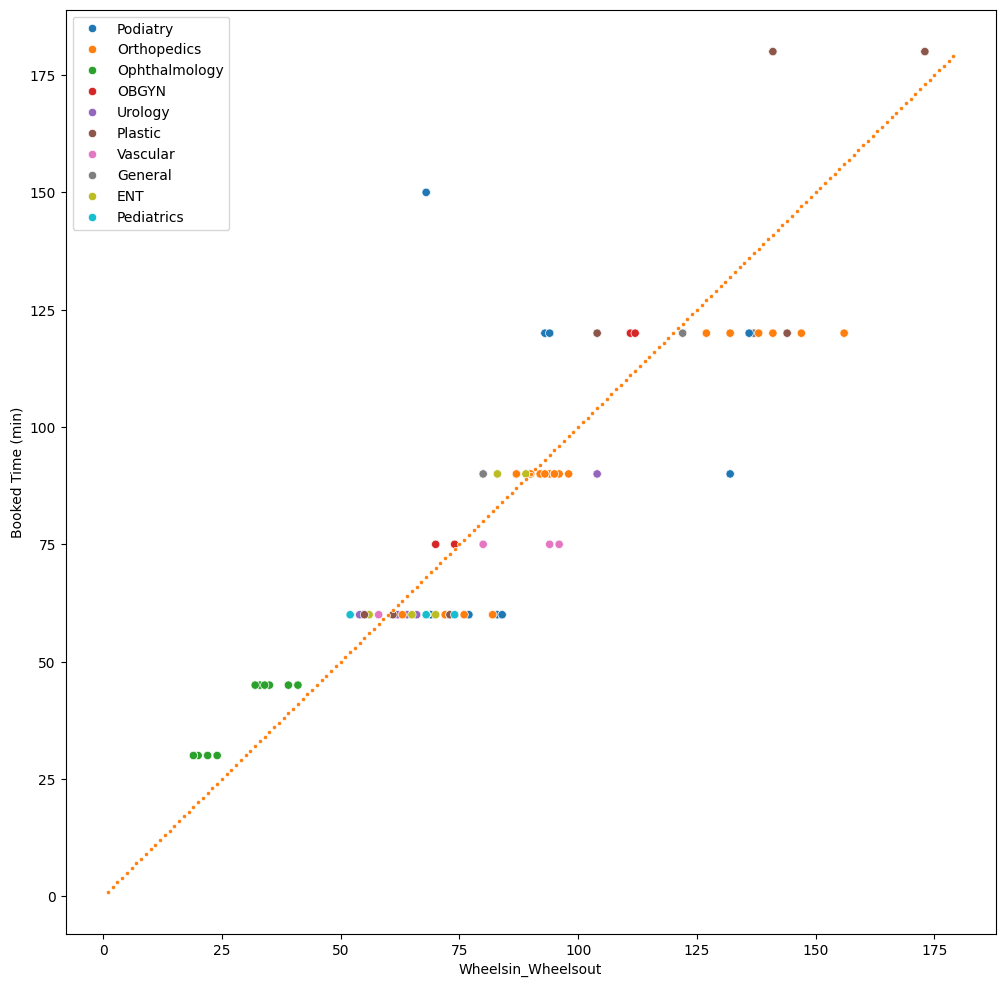

In [94]:
f, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data=data, x = "Wheelsin_Wheelsout",y= "Booked Time (min)",hue="Service")
A =np.arange(1,180,1)
sns.scatterplot(x =A ,y= A,marker = ".")

### Utilization Rate

In [95]:
# Overall Utilization Rate w.r.t planned Booked time [OR Schedule]
data["Wheelsin_Wheelsout"].sum()/data["Booked Time (min)"].sum() * 100

103.24893382243296

In [96]:
# Overall Utilization Rate w.r.t avaiable time

In [97]:
Total_days = (data.Date.max() -data.Date.min())/np.timedelta64(1,"D")
Total_days

87.0

In [98]:
print(min(data["OR Schedule"].dt.time))

07:00:00


In [99]:
print(max(data["OR Schedule"].dt.time))

15:15:00


In [100]:
print(max(data["Wheels Out"].dt.time))

16:40:00


* OR Booking are Done Between : 7:00 to 17:00
* That gives 10 Hrs per Day only ie., 600 mins per day per OR Suite

In [101]:
# Overall Utilization Rate w.r.t avaiable time considering all days as working Days
(data["Wheelsin_Wheelsout"].sum()/( Total_days * 600 * data["OR Suite"].nunique())) * 100

41.451628352490424

In [102]:
data.Date.nunique()

62

In [103]:
# Overall Utilization Rate w.r.t avaiable time considering all days as working Days
(data["Wheelsin_Wheelsout"].sum()/( 62* 600 * data["OR Suite"].nunique())) * 100

58.16599462365591

#### OR Suite

In [104]:
A = data.groupby("OR Suite")[["Booked Time (min)","Wheelsin_Wheelsout"]].sum().reset_index()

In [105]:
A.loc[:,"Available Time"] = 62* 600

In [106]:
A["Actual VS Planned"] = A["Wheelsin_Wheelsout"]/A["Booked Time (min)"] * 100
A["Actual VS TotalAvailable"] = A["Wheelsin_Wheelsout"]/A["Available Time"] * 100

In [107]:
A

,OR Suite,Booked Time (min),Wheelsin_Wheelsout,Available Time,Actual VS Planned,Actual VS TotalAvailable
0,1,22020,23205.0,37200,105.381471,62.379032
1,2,19770,22955.0,37200,116.110268,61.706989
2,3,21210,18911.0,37200,89.160773,50.836022
3,4,22860,22215.0,37200,97.178478,59.717742
4,5,19080,20100.0,37200,105.345912,54.032258
5,6,22860,21408.0,37200,93.648294,57.548387
6,7,18705,21634.0,37200,115.658915,58.155914
7,8,21150,22674.0,37200,107.205674,60.951613


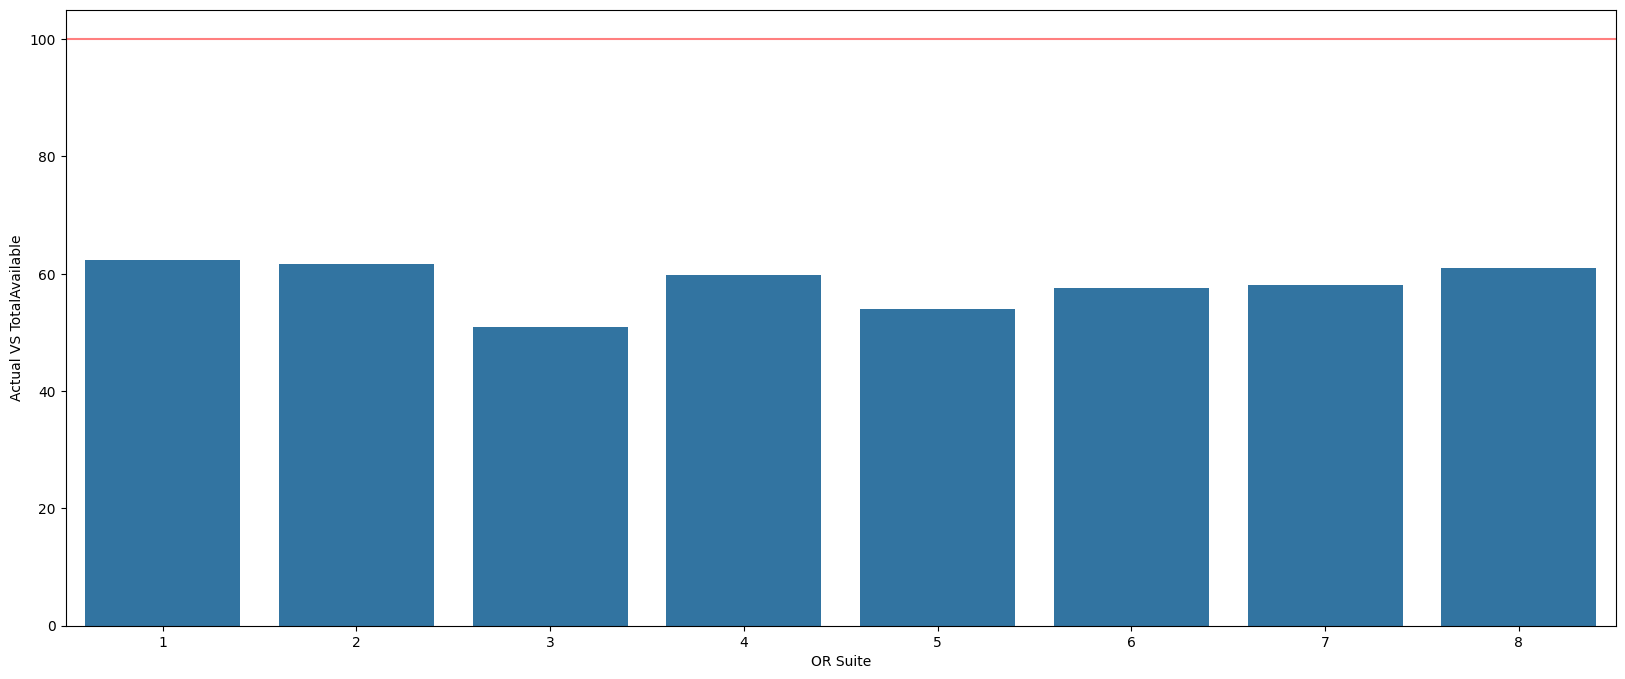

In [108]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="OR Suite",y = "Actual VS TotalAvailable")
ax.axhline(100, color='red', alpha = 0.5)

#### week

In [109]:
 A = data.groupby("Week#").aggregate({"Date":"nunique","Booked Time (min)":"sum","Wheelsin_Wheelsout":"sum"}).reset_index()

In [110]:
A.loc[:,"Available Time"] = A["Date"]* 600 * data["OR Suite"].nunique()

In [111]:
A["Actual VS Planned"] = A["Wheelsin_Wheelsout"]/A["Booked Time (min)"] * 100
A["Actual VS TotalAvailable"] = A["Wheelsin_Wheelsout"]/A["Available Time"] * 100

In [112]:
A

,Week#,Date,Booked Time (min),Wheelsin_Wheelsout,Available Time,Actual VS Planned,Actual VS TotalAvailable
0,01,5,13605,13944.0,24000,102.491731,58.100000
1,02,5,13005,13587.0,24000,104.475202,56.612500
2,03,4,10890,11121.0,19200,102.121212,57.921875
3,04,5,13230,13783.0,24000,104.179894,57.429167
4,05,5,13350,13876.0,24000,103.940075,57.816667
5,06,5,13395,13891.0,24000,103.702874,57.879167
6,07,5,13560,13941.0,24000,102.809735,58.087500
7,08,4,10905,11251.0,19200,103.172856,58.598958
8,09,5,13455,13971.0,24000,103.835006,58.212500
9,10,5,13875,14297.0,24000,103.041441,59.570833


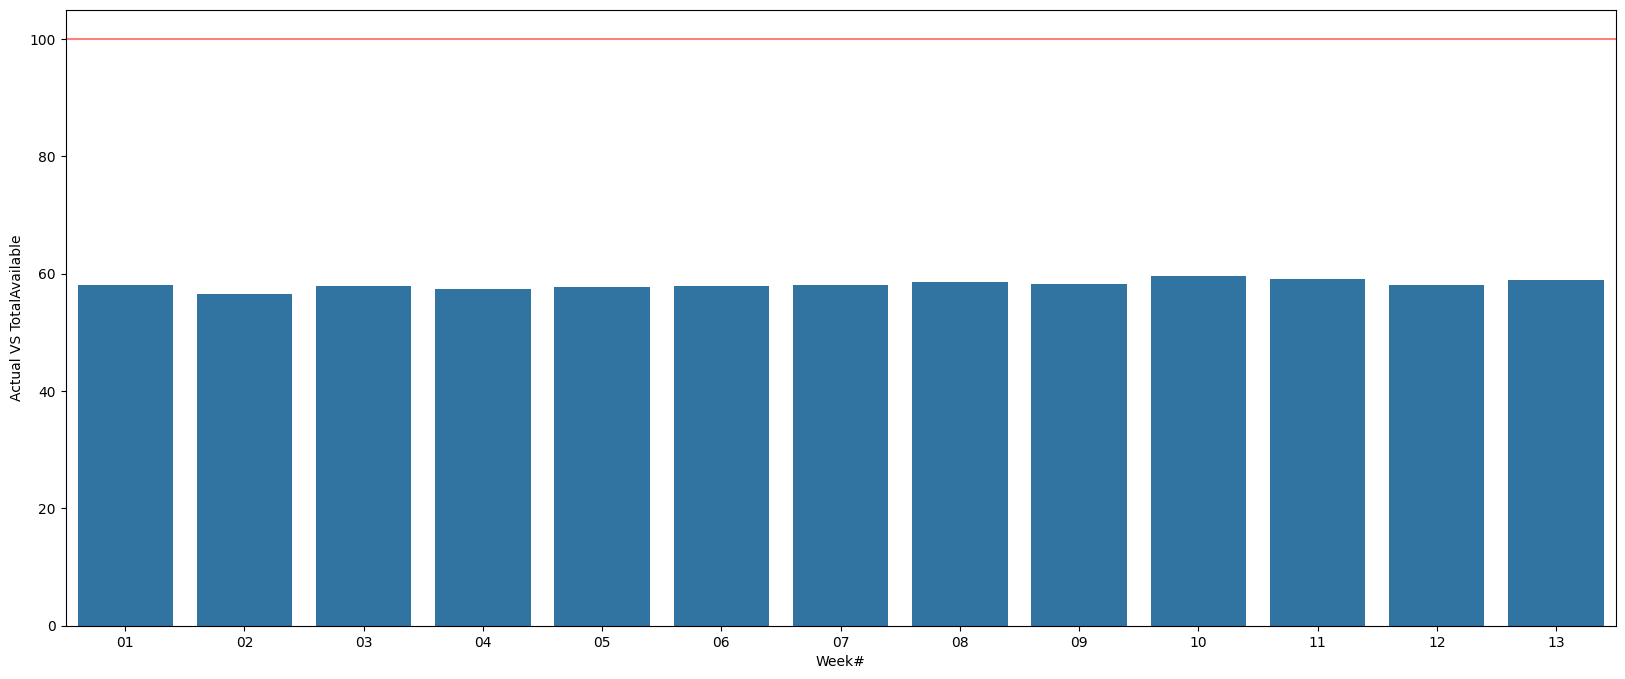

In [113]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="Week#",y = "Actual VS TotalAvailable")
ax.axhline(100, color='red', alpha = 0.5)

In [114]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End', 'End_Wheelsout',
       'Wheelsin_Wheelsout', 'ORSchedule_Wheelsin Ratio',
       'Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',
       'Wheelsin_Wheelsout Ratio'],
      dtype='object')

#### Service

In [115]:
 A = data.groupby(["Service"]).aggregate({"OR Suite":"nunique","Booked Time (min)":"sum","Wheelsin_Wheelsout":"sum"}).reset_index()

In [116]:
A["Actual VS Planned"] = A["Wheelsin_Wheelsout"]/A["Booked Time (min)"] * 100

In [117]:
A

,Service,OR Suite,Booked Time (min),Wheelsin_Wheelsout,Actual VS Planned
0,ENT,1,13200,13612.0,103.121212
1,General,1,12870,13221.0,102.727273
2,OBGYN,1,15990,15047.0,94.102564
3,Ophthalmology,1,14910,11981.0,80.355466
4,Orthopedics,2,28050,32408.0,115.536542
5,Pediatrics,2,13200,14520.0,110.000000
6,Plastic,1,22860,21408.0,93.648294
7,Podiatry,1,22020,23205.0,105.381471
8,Urology,2,12750,13656.0,107.105882
9,Vascular,1,11805,14044.0,118.966540


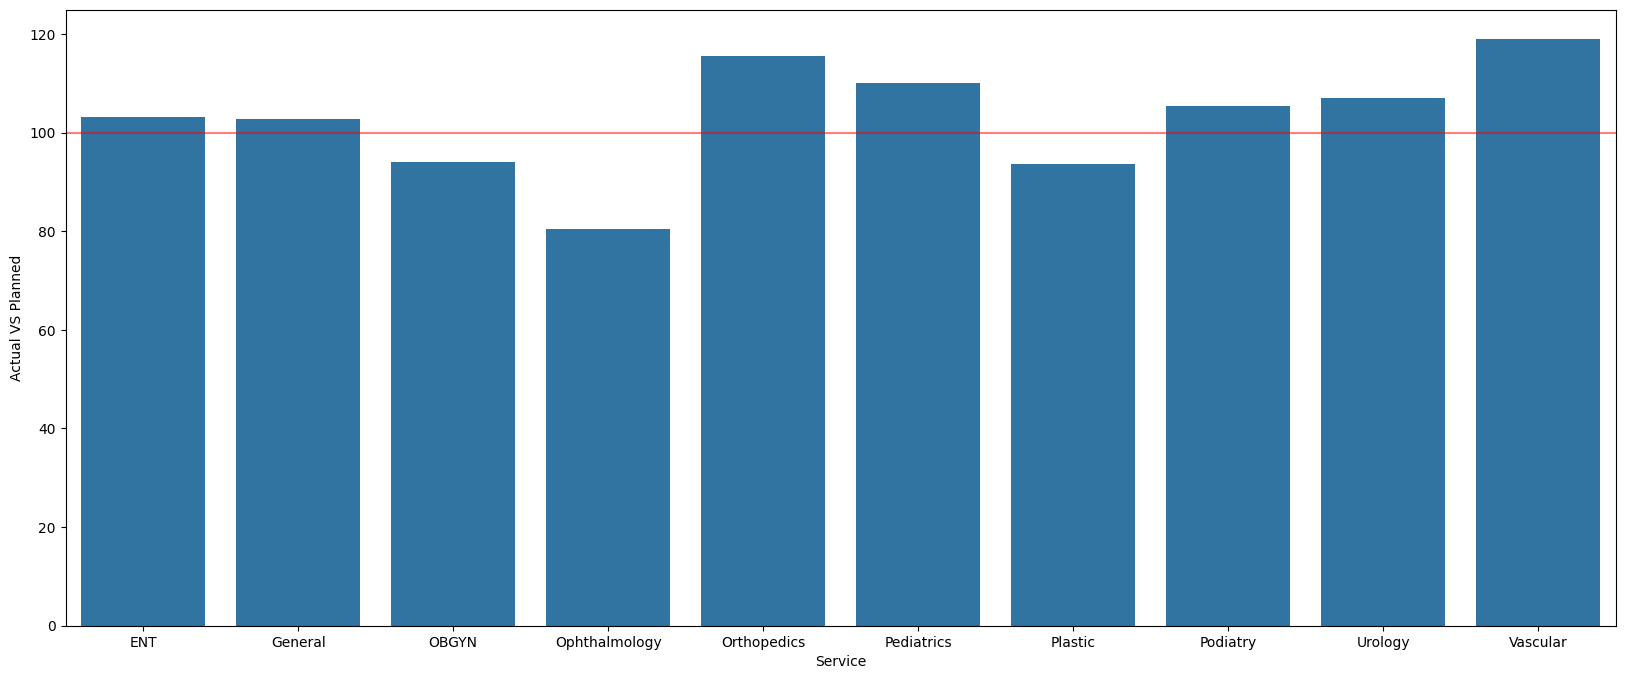

In [118]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="Service",y = "Actual VS Planned")
ax.axhline(100, color='red', alpha = 0.5)

### Overall Stages Ratios

In [119]:
data.head()

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,ORSchedule_Wheelsin,Wheelsin_Start,Start_End,End_Wheelsout,Wheelsin_Wheelsout,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,Wheelsin_Wheelsout Ratio
0,10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,...,5.0,27.0,93.0,12.0,132.0,0.055556,0.300000,1.033333,0.133333,1.466667
1,10002,2022-01-03,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,2022-01-03 08:45:00,2022-01-03 09:48:00,2022-01-03 10:13:00,...,63.0,25.0,48.0,11.0,84.0,1.050000,0.416667,0.800000,0.183333,1.400000
2,10003,2022-01-03,1,Podiatry,28297,Lapidus bunionectomy,150,2022-01-03 10:00:00,2022-01-03 11:50:00,2022-01-03 12:20:00,...,110.0,30.0,22.0,16.0,68.0,0.733333,0.200000,0.146667,0.106667,0.453333
3,10004,2022-01-03,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,2022-01-03 12:45:00,2022-01-03 13:29:00,2022-01-03 13:53:00,...,44.0,24.0,57.0,12.0,93.0,0.366667,0.200000,0.475000,0.100000,0.775000
4,10005,2022-01-03,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-01-03 07:00:00,2022-01-03 07:15:00,2022-01-03 07:50:00,...,15.0,35.0,108.0,13.0,156.0,0.125000,0.291667,0.900000,0.108333,1.300000


In [120]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End', 'End_Wheelsout',
       'Wheelsin_Wheelsout', 'ORSchedule_Wheelsin Ratio',
       'Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',
       'Wheelsin_Wheelsout Ratio'],
      dtype='object')

#### Service

In [121]:
A = data.groupby("Service")[['ORSchedule_Wheelsin Ratio','Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',"Wheelsin_Wheelsout Ratio"]].mean().reset_index()
A

,Service,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,Wheelsin_Wheelsout Ratio
0,ENT,0.469430,0.351043,0.497631,0.191371,1.040045
1,General,0.336111,0.181481,0.711111,0.123148,1.015741
2,OBGYN,0.248333,0.256250,0.544167,0.144167,0.944583
3,Ophthalmology,-0.093114,0.241550,0.365935,0.195276,0.802761
4,Orthopedics,0.813828,0.340005,0.642714,0.180322,1.163041
5,Pediatrics,0.770000,0.373333,0.503333,0.223333,1.100000
6,Plastic,0.171337,0.224316,0.606965,0.129710,0.960990
7,Podiatry,0.585908,0.307520,0.660393,0.168442,1.136355
8,Urology,0.901900,0.329016,0.534888,0.198618,1.062522
9,Vascular,0.713160,0.342312,0.644123,0.197572,1.184008


<Axes: xlabel='Service'>

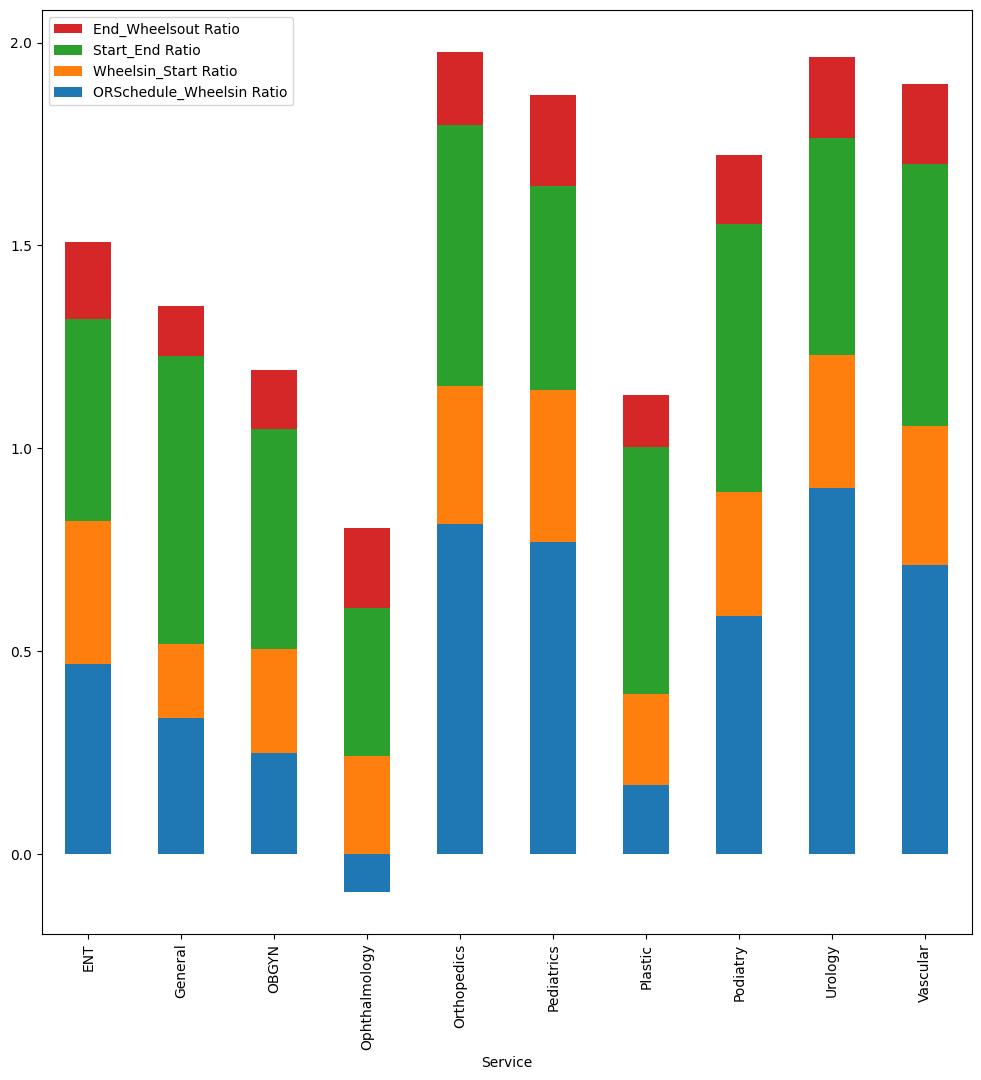

In [122]:
A = data.groupby("Service")[['ORSchedule_Wheelsin Ratio','Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio']].mean().reset_index()
A.set_index("Service", inplace = True)
A.plot( kind='bar', stacked=True, figsize = (12,12),legend = "reverse")


In [123]:
data[data.Service == "ENT"]

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,ORSchedule_Wheelsin,Wheelsin_Start,Start_End,End_Wheelsout,Wheelsin_Wheelsout,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,Wheelsin_Wheelsout Ratio
53,10054,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 07:00:00,2022-01-04 07:04:00,2022-01-04 07:24:00,...,4.0,20.0,25.0,11.0,56.0,0.066667,0.333333,0.416667,0.183333,0.933333
54,10055,2022-01-04,5,ENT,30520,Septoplasty,90,2022-01-04 08:15:00,2022-01-04 08:30:00,2022-01-04 08:48:00,...,15.0,18.0,52.0,13.0,83.0,0.166667,0.200000,0.577778,0.144444,0.922222
55,10056,2022-01-04,5,ENT,30520,Septoplasty,90,2022-01-04 10:00:00,2022-01-04 10:20:00,2022-01-04 10:45:00,...,20.0,25.0,53.0,11.0,89.0,0.222222,0.277778,0.588889,0.122222,0.988889
56,10057,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 11:45:00,2022-01-04 12:30:00,2022-01-04 12:54:00,...,45.0,24.0,32.0,12.0,68.0,0.750000,0.400000,0.533333,0.200000,1.133333
57,10058,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 13:00:00,2022-01-04 14:05:00,2022-01-04 14:28:00,...,65.0,23.0,32.0,10.0,65.0,1.083333,0.383333,0.533333,0.166667,1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,12156,2022-03-31,5,ENT,42826,Tonsillectomy,60,2022-03-31 07:00:00,2022-03-31 07:04:00,2022-03-31 07:24:00,...,4.0,20.0,25.0,11.0,56.0,0.066667,0.333333,0.416667,0.183333,0.933333
2156,12157,2022-03-31,5,ENT,30520,Septoplasty,90,2022-03-31 08:15:00,2022-03-31 08:30:00,2022-03-31 08:48:00,...,15.0,18.0,52.0,13.0,83.0,0.166667,0.200000,0.577778,0.144444,0.922222
2157,12158,2022-03-31,5,ENT,30520,Septoplasty,90,2022-03-31 10:00:00,2022-03-31 10:20:00,2022-03-31 10:45:00,...,20.0,25.0,53.0,11.0,89.0,0.222222,0.277778,0.588889,0.122222,0.988889
2158,12159,2022-03-31,5,ENT,42826,Tonsillectomy,60,2022-03-31 11:45:00,2022-03-31 12:30:00,2022-03-31 12:54:00,...,45.0,24.0,32.0,12.0,68.0,0.750000,0.400000,0.533333,0.200000,1.133333


#### OR Suite

In [124]:
A = data.groupby("OR Suite")[['ORSchedule_Wheelsin Ratio','Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio',"Wheelsin_Wheelsout Ratio"]].mean().reset_index()
A

,OR Suite,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,Wheelsin_Wheelsout Ratio
0,1,0.585908,0.307520,0.660393,0.168442,1.136355
1,2,0.959843,0.352480,0.625507,0.190906,1.168893
2,3,0.113326,0.273070,0.398798,0.201987,0.873855
3,4,0.492761,0.283862,0.534055,0.160609,0.978526
4,5,0.612626,0.344775,0.515326,0.198019,1.058120
5,6,0.171337,0.224316,0.606965,0.129710,0.960990
6,7,0.735856,0.354699,0.587905,0.207859,1.150463
7,8,0.315502,0.223387,0.709050,0.130018,1.062455


<Axes: xlabel='OR Suite'>

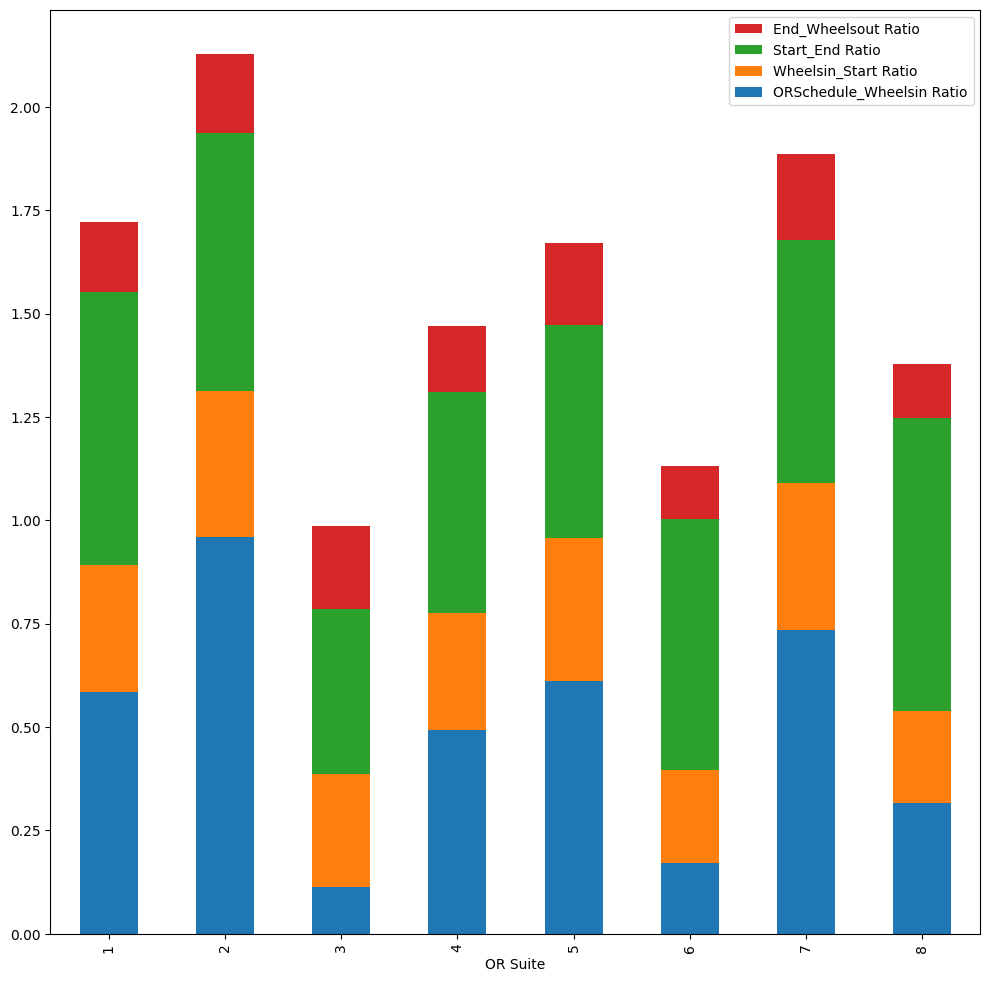

In [125]:
A = data.groupby("OR Suite")[['ORSchedule_Wheelsin Ratio','Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio']].mean().reset_index()
A.set_index("OR Suite", inplace = True)
A.plot( kind='bar', stacked=True, figsize = (12,12),legend = "reverse",)

In [ ]:
data[data.Service == "ENT"]

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,ORSchedule_Wheelsin,Wheelsin_Start,Start_End,End_Wheelsout,Wheelsin_Wheelsout,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,Wheelsin_Wheelsout Ratio
53,10054,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 07:00:00,2022-01-04 07:04:00,2022-01-04 07:24:00,...,4.0,20.0,25.0,11.0,56.0,0.066667,0.333333,0.416667,0.183333,0.933333
54,10055,2022-01-04,5,ENT,30520,Septoplasty,90,2022-01-04 08:15:00,2022-01-04 08:30:00,2022-01-04 08:48:00,...,15.0,18.0,52.0,13.0,83.0,0.166667,0.200000,0.577778,0.144444,0.922222
55,10056,2022-01-04,5,ENT,30520,Septoplasty,90,2022-01-04 10:00:00,2022-01-04 10:20:00,2022-01-04 10:45:00,...,20.0,25.0,53.0,11.0,89.0,0.222222,0.277778,0.588889,0.122222,0.988889
56,10057,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 11:45:00,2022-01-04 12:30:00,2022-01-04 12:54:00,...,45.0,24.0,32.0,12.0,68.0,0.750000,0.400000,0.533333,0.200000,1.133333
57,10058,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 13:00:00,2022-01-04 14:05:00,2022-01-04 14:28:00,...,65.0,23.0,32.0,10.0,65.0,1.083333,0.383333,0.533333,0.166667,1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,12156,2022-03-31,5,ENT,42826,Tonsillectomy,60,2022-03-31 07:00:00,2022-03-31 07:04:00,2022-03-31 07:24:00,...,4.0,20.0,25.0,11.0,56.0,0.066667,0.333333,0.416667,0.183333,0.933333
2156,12157,2022-03-31,5,ENT,30520,Septoplasty,90,2022-03-31 08:15:00,2022-03-31 08:30:00,2022-03-31 08:48:00,...,15.0,18.0,52.0,13.0,83.0,0.166667,0.200000,0.577778,0.144444,0.922222
2157,12158,2022-03-31,5,ENT,30520,Septoplasty,90,2022-03-31 10:00:00,2022-03-31 10:20:00,2022-03-31 10:45:00,...,20.0,25.0,53.0,11.0,89.0,0.222222,0.277778,0.588889,0.122222,0.988889
2158,12159,2022-03-31,5,ENT,42826,Tonsillectomy,60,2022-03-31 11:45:00,2022-03-31 12:30:00,2022-03-31 12:54:00,...,45.0,24.0,32.0,12.0,68.0,0.750000,0.400000,0.533333,0.200000,1.133333
